# Customers Churn - Classification Prediction Analysis

***

### Customers Churn is a measure of customers leaving the company (stop using its products or services) in a given time period.
### Analyzing and predicting customers churn help the company to understand customers' pain points and develop a customer retention plan accordingly to try and prevent customers loss.  
### The object of this project is to analyze customers attributes available and predict if a customer will churn or not.

#### We will try to answer these questions:
#### 1. What is the likelihood of an active customer to churn?
#### 2. What are key indicators of a customer churn?
***

In [86]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline


# Model selection
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Accuracy
from sklearn.metrics import accuracy_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Plotting decision tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Print DataFrame
from pandas.plotting import table

import time
from math import ceil

In [87]:
# Loading the dataset

data = pd.read_csv('churn.csv')

pd.options.display.max_columns = len(data.columns)

#### Functions

In [88]:
# Defining a function to create bar charts in order to visualize the distribution of categorical variables:

def plot_cat_dist(columns, num_of_columns, fig_name):
    palettes = ["viridis_r", "Paired", "magma_r", "icefire_r", "mako", "flare", "crest", "viridis", "cubehelix"]
    num_of_rows = ceil(len(columns)/num_of_columns)
    
    
    fig = plt.figure(figsize=(16, 6*num_of_rows))
    sns.set(font_scale=1.5)
    
    for i in range(len(columns)):
        
        sub_fig = fig.add_subplot(num_of_rows, num_of_columns, i+1)
        c = sns.histplot(x=columns[i], data=data_EDA, stat='percent', multiple='dodge', shrink=0.8, palette='Set2')
        c.set_ylabel('percent', fontsize=18)
        c.set_xlabel('')
        c.set_title('Distribution of {}'.format(columns[i]), fontsize=20, weight='bold')
        

        for bar in c.containers:
            c.bar_label(bar, label_type='center', color='black',
                        labels=[f'{b.get_height():.1f}%' if b.get_height() > 0 else '' for b in bar],
                        fontsize=18, weight='bold')
            
            pal = palettes[i]
            for b, c in zip(bar, sns.color_palette(pal)):
                b.set_facecolor(c)

    fig.align_labels()

    #fig.savefig(fig_name)
    plt.show()
####################################################################################################      

# Defining a function to create histograms in order to visualize the distribution of numerical variables:
  
def plot_numeric_dist(columns, num_of_columns, fig_name):
    
    colors = ["royalblue", "purple", "green", "darkorange", "teal", "gold"]
    num_of_rows = ceil(len(columns)/num_of_columns)
    
    fig = plt.figure(figsize=(16, 8*num_of_rows))
    sns.set(font_scale=1.5)
    
    for i in range(len(columns)):
        sub_fig = fig.add_subplot(num_of_rows, num_of_columns, i+1)
        sub_fig = sns.histplot(x=columns[i], data=data_EDA, fill='True', color=colors[i], kde=True)

    fig.align_labels()

    #fig.savefig(fig_name)
    plt.show()
####################################################################################################    
    
# Defining a function to create bar charts in order to visualize the categorical variables 
# by the target variable 'churn':

def cat_cols_by_churn(columns, num_of_columns, fig_name):
    palettes = ["viridis_r", "Paired", "magma_r", "icefire_r", "mako", "flare", "crest", "viridis", "cubehelix"]
    num_of_rows = ceil(len(columns)/num_of_columns)
    
    
    fig = plt.figure(figsize=(16, 10*num_of_rows))
    sns.set(font_scale=1.5)
    
    for i in range(len(columns)):
        
        sub_fig = fig.add_subplot(num_of_rows, num_of_columns, i+1)
        c = sns.histplot(data=data_EDA, x=columns[i], hue='churn', palette=palettes[i], stat='percent', multiple='fill', 
                         shrink=0.8, binwidth=2)
        c.set_ylabel('percent', fontsize=18)
        c.set_xlabel('')
        c.set_title('Distribution of {} by churn'.format(columns[i]), fontsize=20, weight='bold')
        
        for bar in c.containers:
            c.bar_label(bar, label_type='center', color='black',
                        labels=[f'{b.get_height():.1f}%' if b.get_height() > 0 else '' for b in bar],
                        fontsize=18, weight='bold')
    
    #fig.savefig(fig_name)
    plt.show()
####################################################################################################

# Defining a function to create histograms in order to visualize the continuous numeric variables 
# by the target variable 'churn':

def numeric_by_churn(columns, num_of_columns, fig_name):

    num_of_rows = ceil(len(columns)/num_of_columns)
    
    
    fig = plt.figure(figsize=(16, 8*num_of_rows))
    sns.set(font_scale=1.5)
    
    for i in range(len(columns)):
        
        churned = data_EDA[data_EDA['churn']=='Yes'][columns[i]]
        not_churned = data_EDA[data_EDA['churn']=='No'][columns[i]]
        
        sub_fig = fig.add_subplot(num_of_rows, num_of_columns, i+1)
        sns.kdeplot(churned, color='green', shade=True)
        sns.kdeplot(not_churned, color='red', shade=True)
        sub_fig.set_title('Distribution of {} by Churn'.format(columns[i]), fontsize=16)
        sub_fig.set_ylabel('Frequency', fontsize=16)
        sub_fig.grid(axis='y', alpha=0.5)
        sub_fig.legend(['Yes', 'No'], title='Churn', loc='upper right')
        
    #fig.savefig(fig_name)
    plt.show()
####################################################################################################    

# Defining a function to create boxplots in order to visualize the continuous numeric variables 
# by the target variable 'churn':

def boxplot_numeric_by_churn(columns, num_of_columns, fig_name):

    num_of_rows = ceil(len(columns)/num_of_columns)
    
    
    fig = plt.figure(figsize=(16, 8*num_of_rows))
    sns.set(font_scale=1.5)
    
    for i in range(len(columns)):
        
        
        sub_fig = fig.add_subplot(num_of_rows, num_of_columns, i+1)
        sns.boxplot(x=columns[i], y='churn', data=data_EDA, hue='churn', palette='husl')
        sub_fig.set_title('Distribution of {} by Churn'.format(columns[i]), fontsize=16)
        sub_fig.set_xlabel('')

        
    #fig.savefig(fig_name)
    plt.show()
####################################################################################################

# Defining a function for plotting decision trees:
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))
    graph.format = 'png'
    #graph.render('dtree')
#################################################################################################### 


***
## Data Dictionary
***

 * <b>customerID</b>
 * <b>Churn</b> - whether the customer has churned or not <b>(No, Yes)</b>
 
## Demographic info:
 * <b>gender</b> - whether the client is a male or a female <b>(Female, Male)</b>
 * <b>SeniorCitizen</b> - whether the customer is a senior citizen or not <b>(0, 1)</b>
 * <b>Partner</b> - whether the customer has a partner or not <b>(Yes, No)</b>
 * <b>Dependents</b> - whether the customer has dependents or not <b>(Yes, No)</b>


## Account info:
 * <b>tenure</b> - number of months the customer stayed with the company <b>(numerous numeric values)</b>
 * <b>Contract</b> - the customer's terms of contract <b>(Month-to-month, One year, Two year)</b>
 * <b>PaperlessBilling</b> - whether the customer has paperless billing or not <b>(Yes, No)</b>
 * <b>PaymentMethod</b> - the customer's payment method <b>(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</b>
 * <b>MonthlyCharges</b> - the amount charged to the customer monthly <b>(numerous numeric values)</b>
 * <b>TotalCharges</b> - the total amount charged to the customer annualy <b>(numerous numeric values)</b>


## Services info:
 * <b>PhoneService</b> - whether the customer has a phone service or not <b>(No, Yes)</b>
 * <b>MultipleLines</b> - whether the customer has multiple lines or not <b>(No phone service, No, Yes)</b>
 * <b>InternetService</b> - customer's internet service provider <b>(DSL, Fiber optic, No)</b>
 * <b>OnlineSecurity</b> - whether the customer has online security or not <b>(No, Yes, No internet service)</b>
 * <b>OnlineBackup</b> - whether the customer has online backup or not <b>(Yes, No, No internet service)</b>
 * <b>DeviceProtection</b> - whether the customer has device protection or not <b>(No, Yes, No internet service)</b>
 * <b>TechSupport</b> - whether the customer has tech support or not <b>(No, Yes, No internet service)</b>
 * <b>StreamingTV</b> - whether the customer has streaming TV or not <b>(No, Yes, No internet service)</b>
 * <b>StreamingMovies</b> - whether the customer has streaming movies or not <b>(No, Yes, No internet service)</b>

***
## Viewing the Dataframe
***

In [89]:
data.shape

(7043, 21)

In [90]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [91]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***
#### The dataset contains 7043 examples (rows) and 21 columns:
* The <b>'Churn'</b> column is the target variable.
* The remaining columns are features which can be divided into: <b>demographic info, account info, and services info.</b>
***

In [93]:
# Check the unique values of each column

for column in data.columns:
    print("Column: {} - Unique Values: {}".format(column, data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

## Data Cleaning

In [94]:
# Rename columns to lower letters

data = data.rename(columns = str.lower)

In [95]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [96]:
# 'totalcharges' shouldn't be an object data type. Looking at its values:

data['totalcharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

In [97]:
# 'totalcharges' should be numeric data type. 
# There are also 11 empty values (spaces) that will raise an error when converting to numeric type.

data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce') 
# >> errors='coerce' : invalid parsing will be set to NaN

In [98]:
# Looking at the NaN values of 'totalcharges':

data[data['totalcharges'].isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [99]:
# There are 11 NaN 'totalcharges' observations. All these observations also have a 'tenure' value 0, 
# while their 'monthlycharges' values aren't nulls. As the above seems contradictory, we decide 
# to remove these observations:

data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [100]:
# Dropping 'customerid' column as it isn't helpful in predicting whether a customer will churn or not:

data.drop('customerid', axis=1, inplace=True)

In [101]:
# Removing the substring '(automatic)' from some of the 'paymentmethod' classes:

data['paymentmethod'] = data['paymentmethod'].str.replace(' (automatic)', '', regex=False)
data['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [102]:
# Mapping seniorcitizen to object dtype for EDA purposes:

data['seniorcitizen'] = data['seniorcitizen'].map({0:'No', 1:'Yes'})

***
## EDA
***

In [103]:
data_EDA = data.copy()

### The Target Variable - 'Churn'

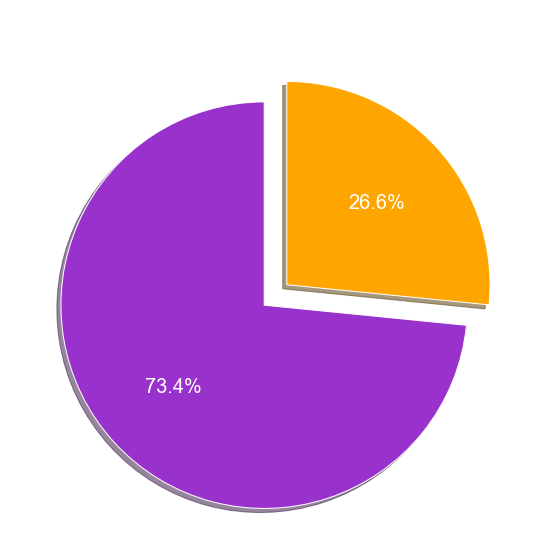

In [104]:
# Visualize 'churn' distribution:

plt.figure(figsize=(8,8))
plt.pie(data_EDA["churn"].value_counts(), labels=('No_Churn','Yes_Churn'), 
        textprops={'color':"w", 'fontsize':20}, explode = [0.15,0], autopct ='%1.1f%%', 
        shadow = True, startangle = 90, labeldistance = 1.1, colors=['darkorchid', 'orange'])
plt.title('Churn Distribution', fontsize=24, weight='bold', color='w')
plt.tight_layout()

#plt.savefig('Churn_Distribution.png')
plt.show()

Churn classes aren't equally distributed among all observations >> <b>Data is imbalanced.</b>

### Features

#### Distribution

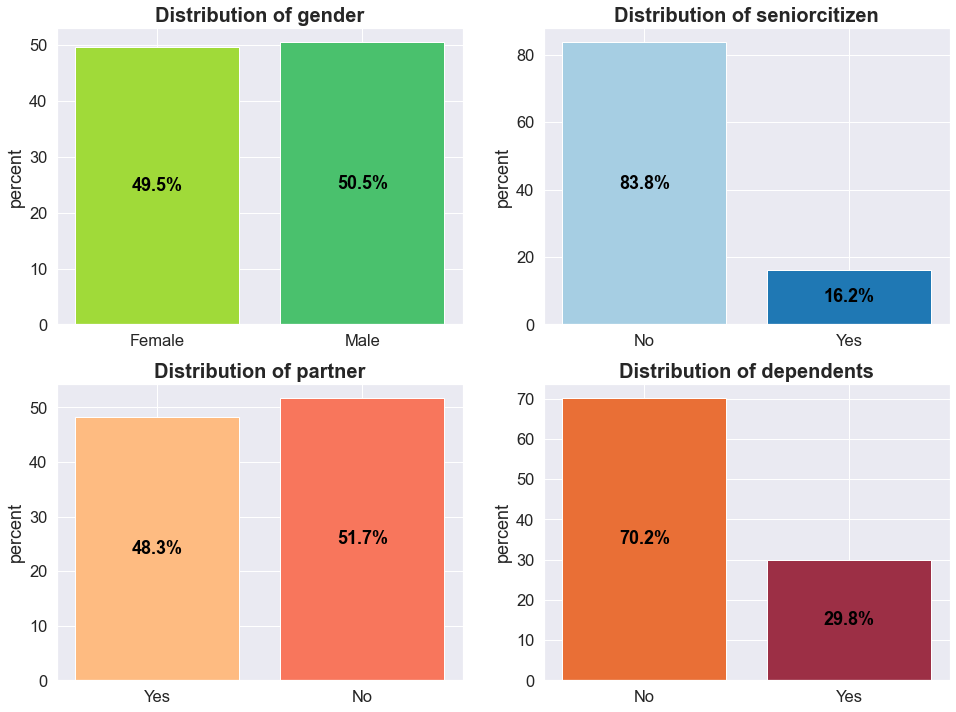

In [105]:
# Exploring distribution of demographic categorical features:

dem_cat_columns=['gender', 'seniorcitizen', 'partner', 'dependents']
plot_cat_dist(dem_cat_columns, 2, 'Demographical_Categorical_Distribution.png')

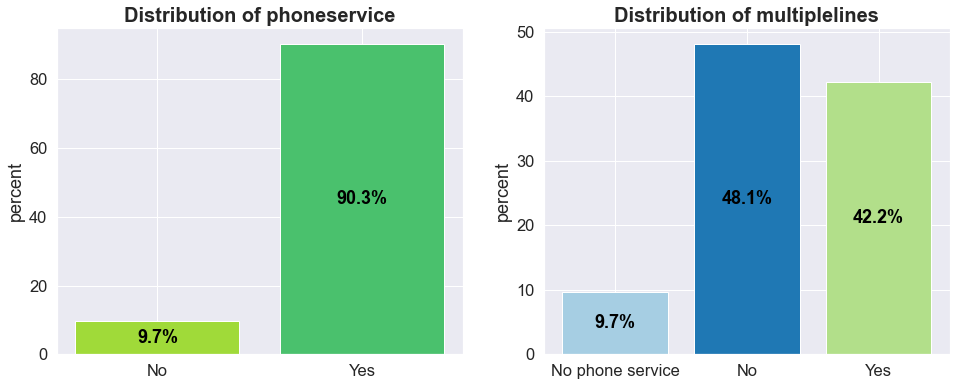

In [106]:
# Exploring distribution of phone services categorical features:

serv_phone_cat_columns = ['phoneservice', 'multiplelines']
plot_cat_dist(serv_phone_cat_columns, 2, 'Service_Phone_Categorical_Distribution.png')

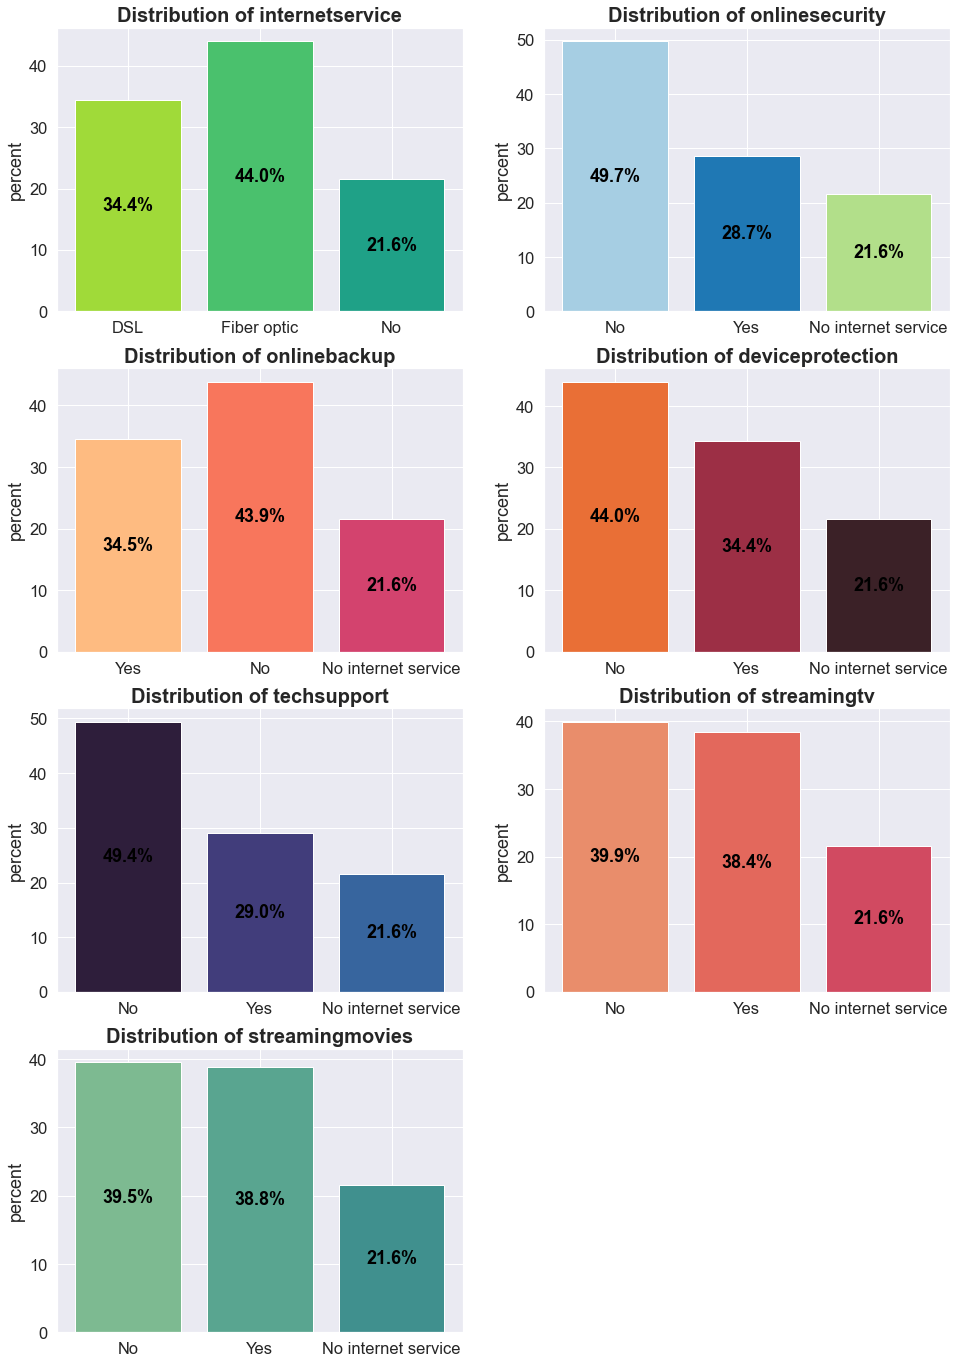

In [107]:
# Exploring distribution of internet services categorical features:

serv_internet_cat_columns = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                             'techsupport', 'streamingtv', 'streamingmovies']
plot_cat_dist(serv_internet_cat_columns, 2, 'Service_Internet_Categorical_Distribution.png')

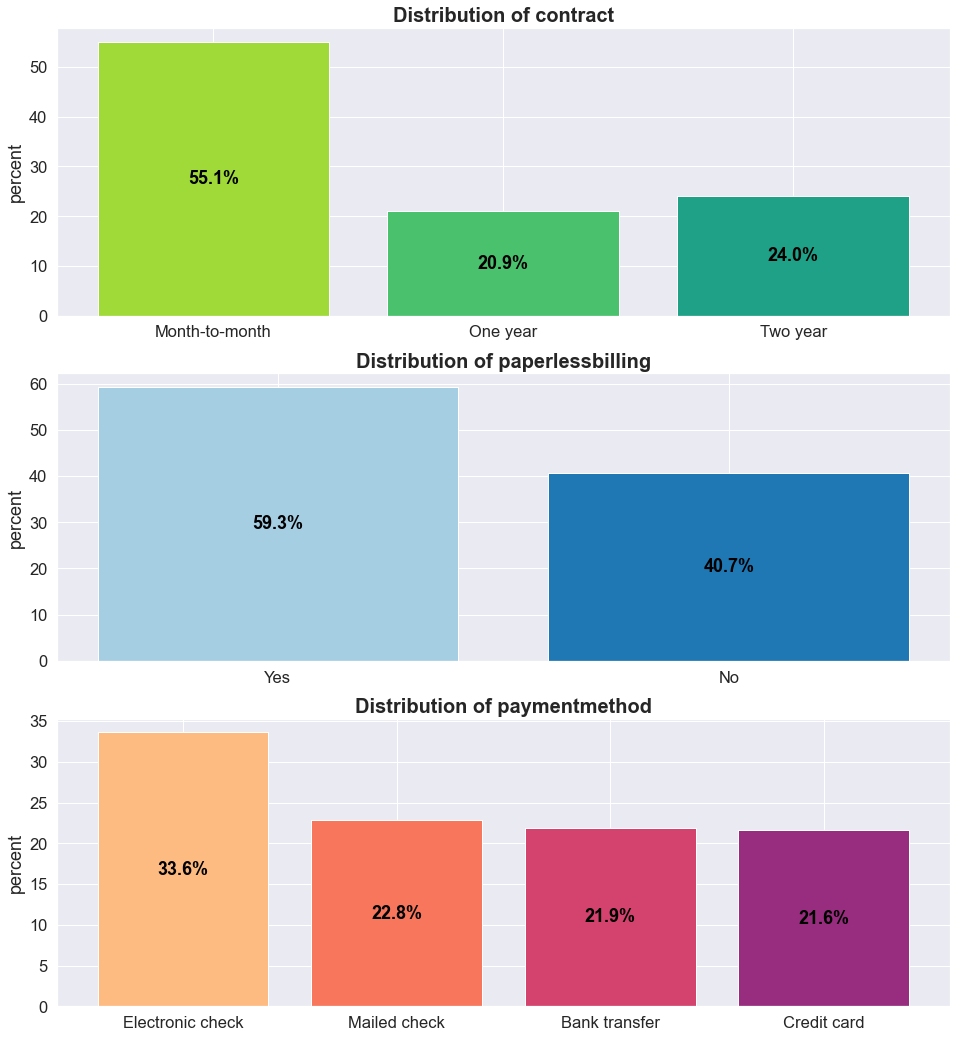

In [108]:
# Exploring distribution of account categorical features:

account_cat_columns = ['contract', 'paperlessbilling', 'paymentmethod']
plot_cat_dist(account_cat_columns, 1, 'Account_Categorical_Distribution.png')

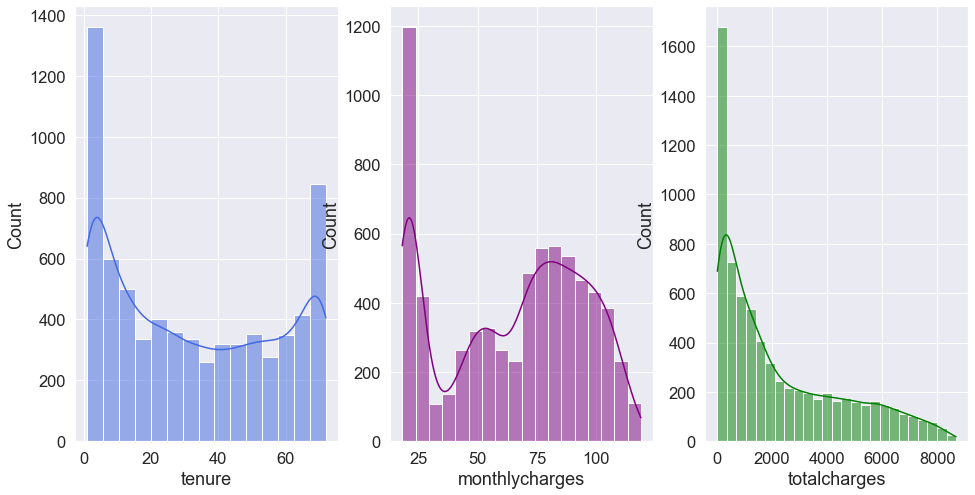

In [109]:
# Exploring numeric continuous features:

numeric_columns = ['tenure', 'monthlycharges', 'totalcharges']
plot_numeric_dist(numeric_columns, 3, 'numeric_columns_dist.png')

#### Distribution of Fatures by Target Variable 'Churn'

#### Categorical Features:

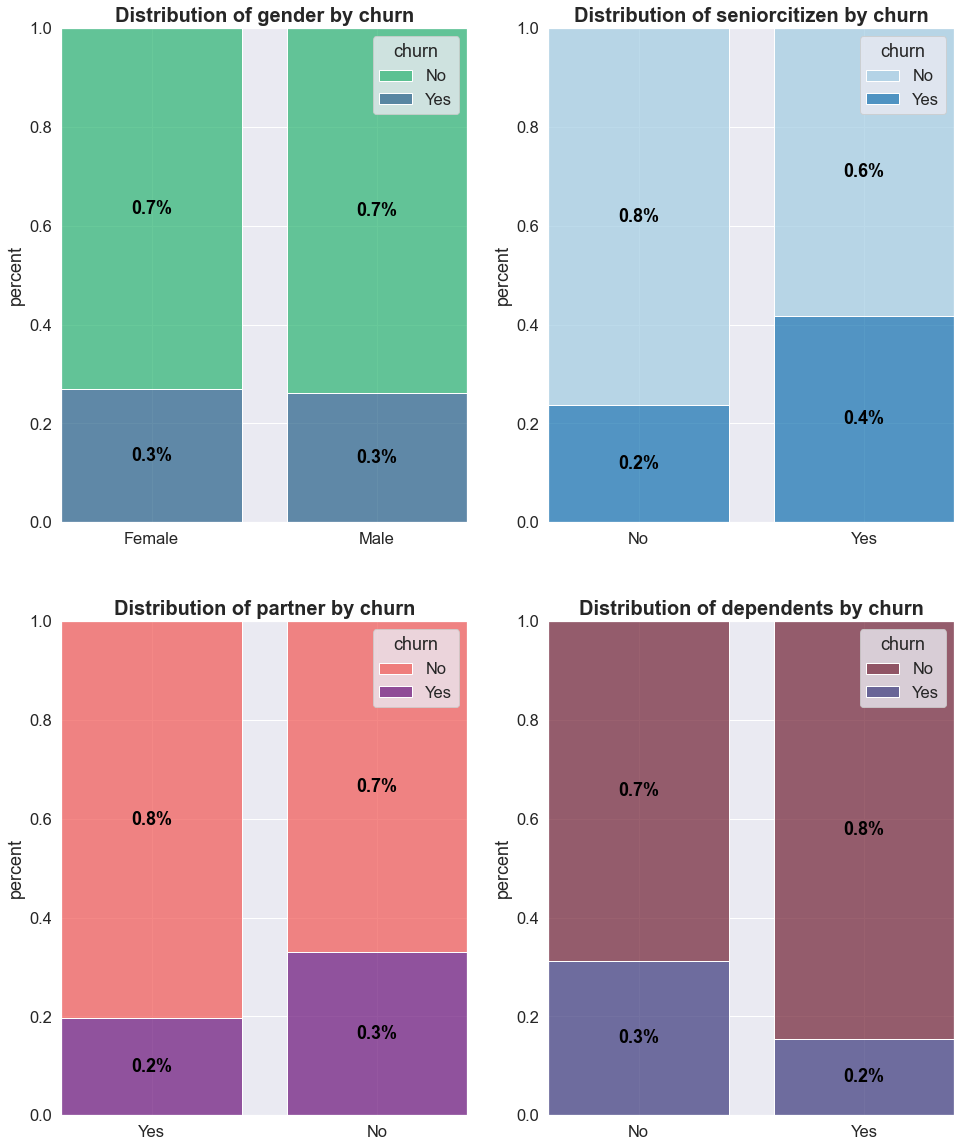

In [110]:
# Exploring distribution of demographic categorical features by churn:

dem_cat_columns=['gender', 'seniorcitizen', 'partner', 'dependents']
cat_cols_by_churn(dem_cat_columns, 2, 'dem_cat_by_churn.png')

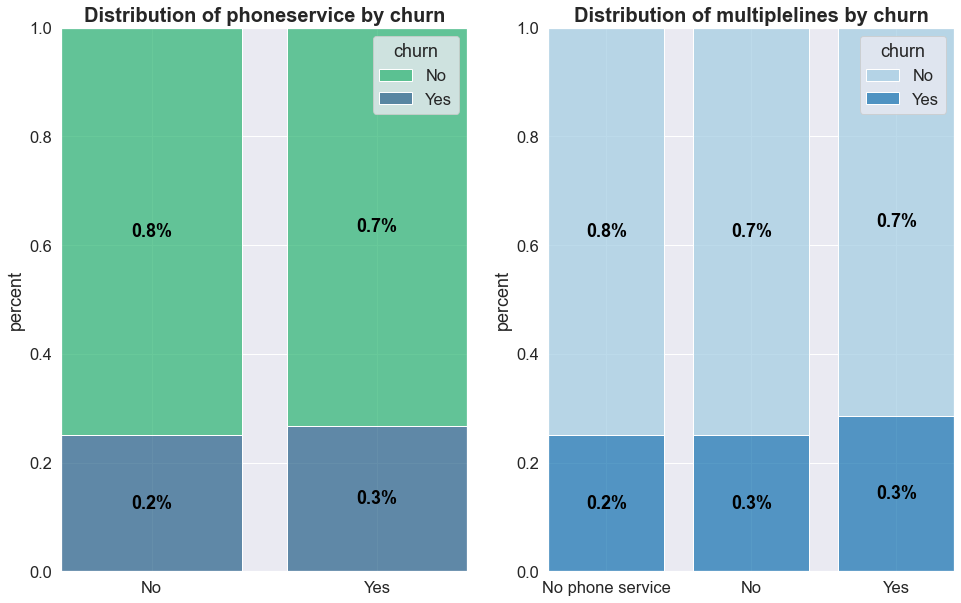

In [111]:
# Exploring distribution of phone service categorical features by churn:

phone_serv_cat_columns=['phoneservice', 'multiplelines']
cat_cols_by_churn(phone_serv_cat_columns, 2, 'Phone_Services_by_Churn.png')

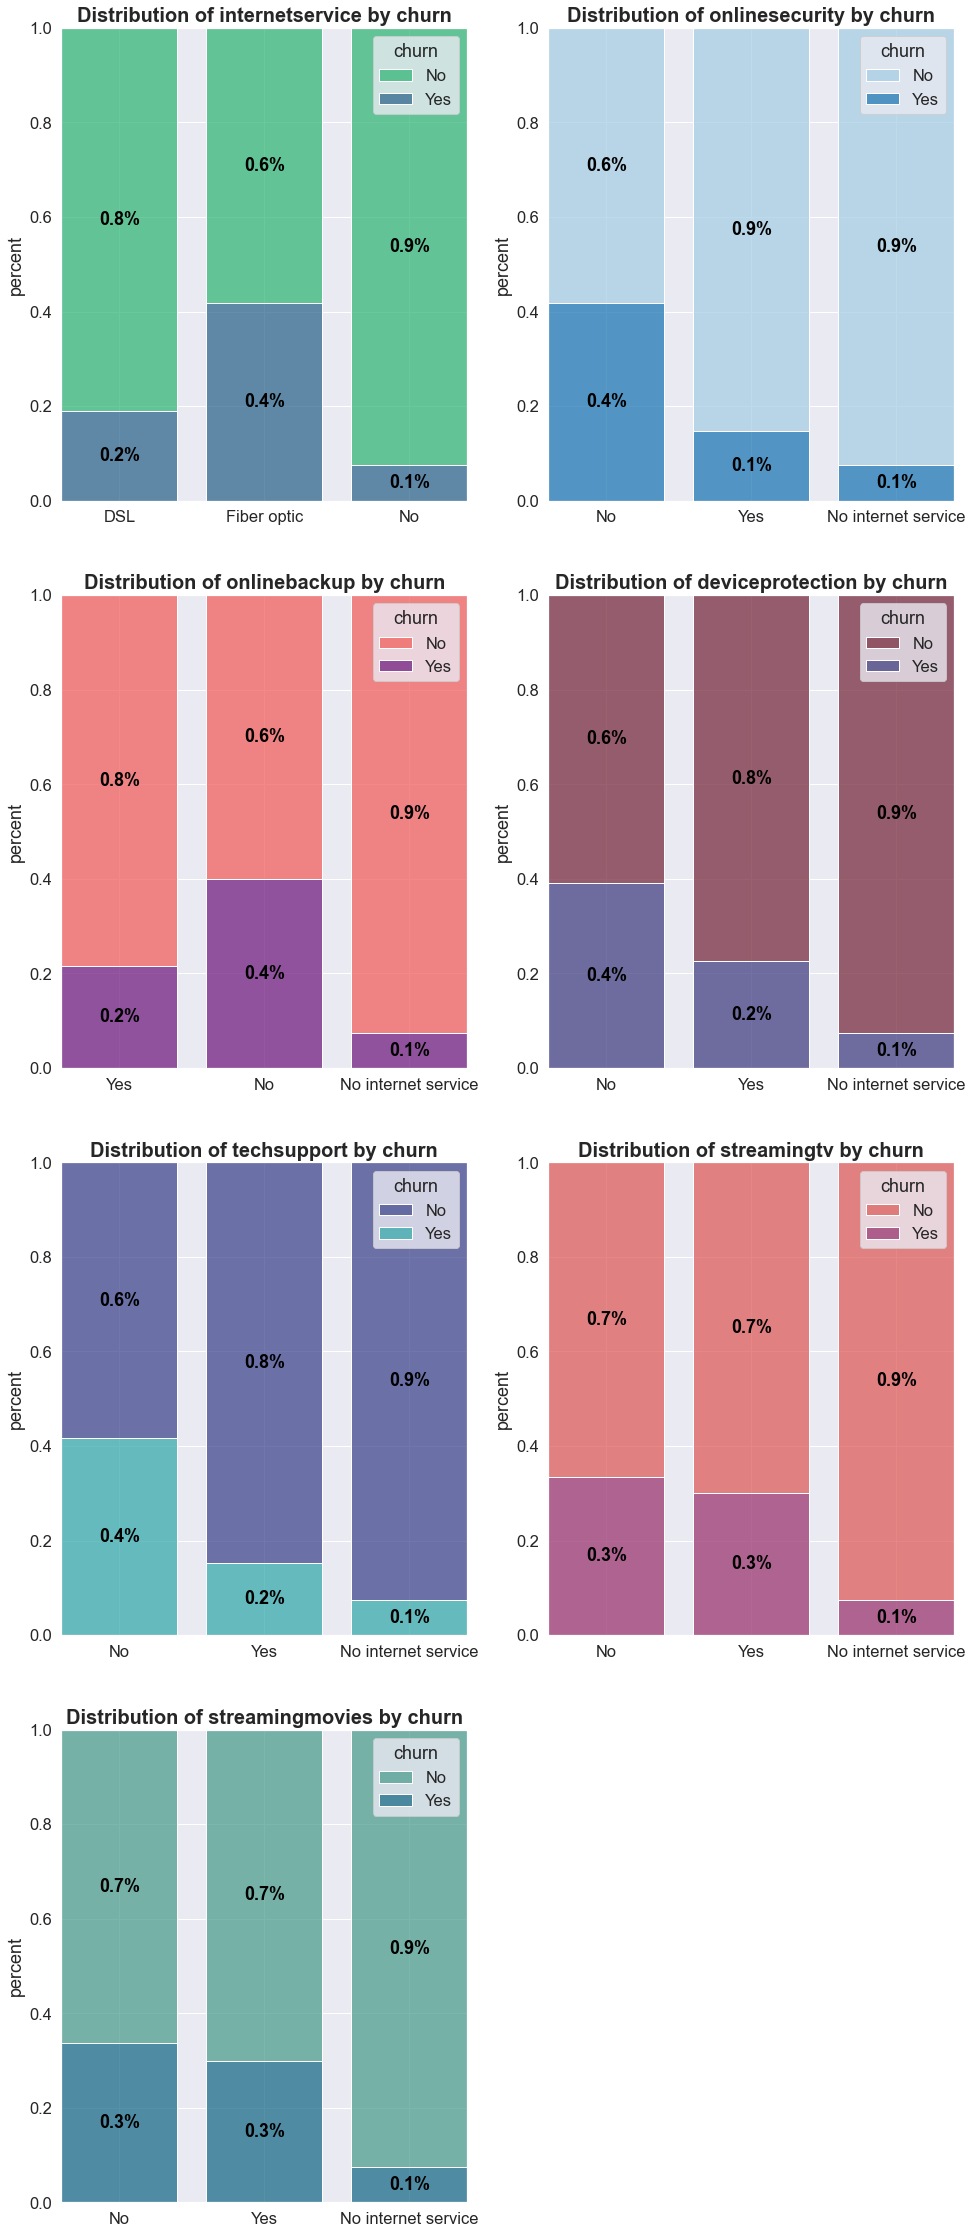

In [112]:
# Exploring distribution of internet service categorical features by churn:

internet_serv_cat_columns=['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
cat_cols_by_churn(internet_serv_cat_columns, 2, 'Internet_Services_by_Churn.png')

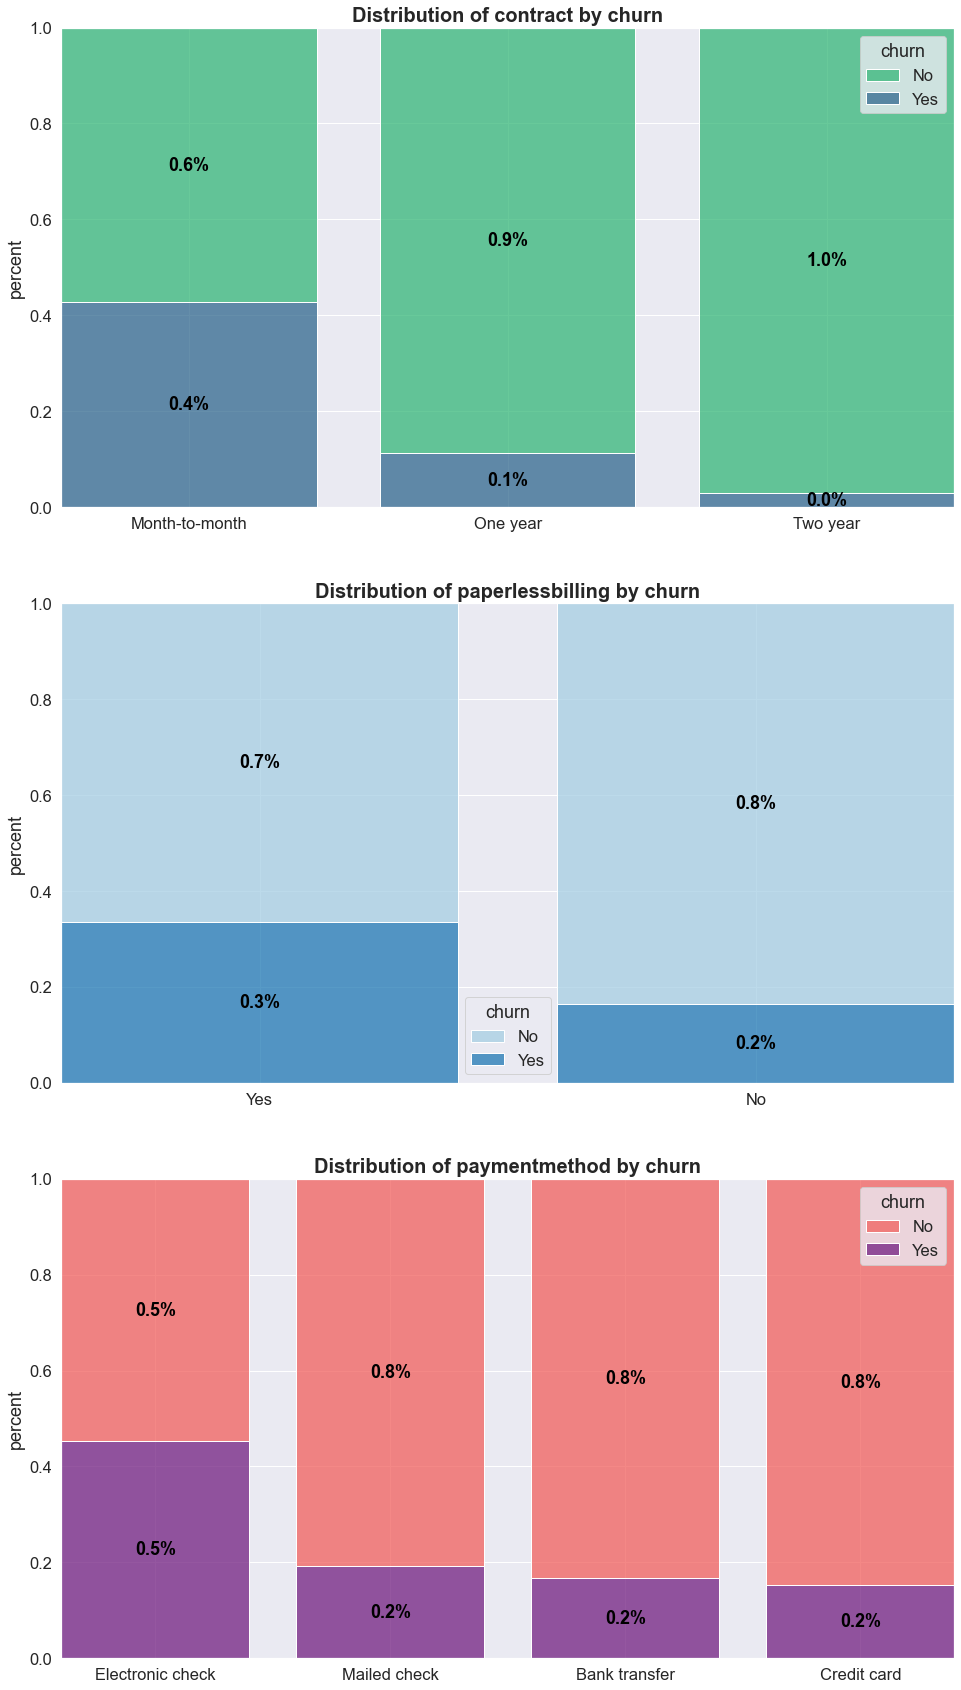

In [113]:
# Exploring distribution of account categorical features by churn:

account_cat_columns=['contract', 'paperlessbilling', 'paymentmethod']
cat_cols_by_churn(account_cat_columns, 1, 'Account_by_Churn.png')

* Gender - There is similar proportion of men and women, and almost no difference in the rate of Churn between the genders.
* Age - Most of the customers are younger. Senior citizens churn almost double than non senior citizens.
* Familial status - Almost half of the customers have a partner, but only about a third of the customers have dependents. Customers with a partner churn less than single customers, customers with dependents churn less than customers without dependents.
* Most of the customers have opted for phone services. Both customers who opted to have or not to have phone services have similar churn percentages.
* Almost half of the customers with phone service opted to have multiple lines. Customers with or without multiple lines have similar churn percentages.
* Almost half of the customers have Fiber Optic internet, and about 20% of the customers don't have internet at all. Customers with Fiber Optic Internet Services churn more than double than customers with DSL services. Customers with no internet services at all churn percentage is very low in comparison to customers with internet service.
* Of the customers who have opted to have internet, almost half haven't opted for additional services. Customers who haven't opted for online services (online security, online backup, device protection, tech support) churn much more than those who have opted for these services.
* Almost 40% of the customers have opted to have streaming services. These customers churn more than customers without streaming services.
* More than half of the customers are on a monthly contract. Customers with monthly contracts churn much more than customers with yearly or bi-yearly contracts.
* More than half of the customers subscribed for paperless billing. Customers subscribed to paperless billing churn much more than those who are not subscribed.
* Almost 30% of the customers pay via Electronic Check. Customers who opted for Electronic Check as a payment method are more likely to churn.

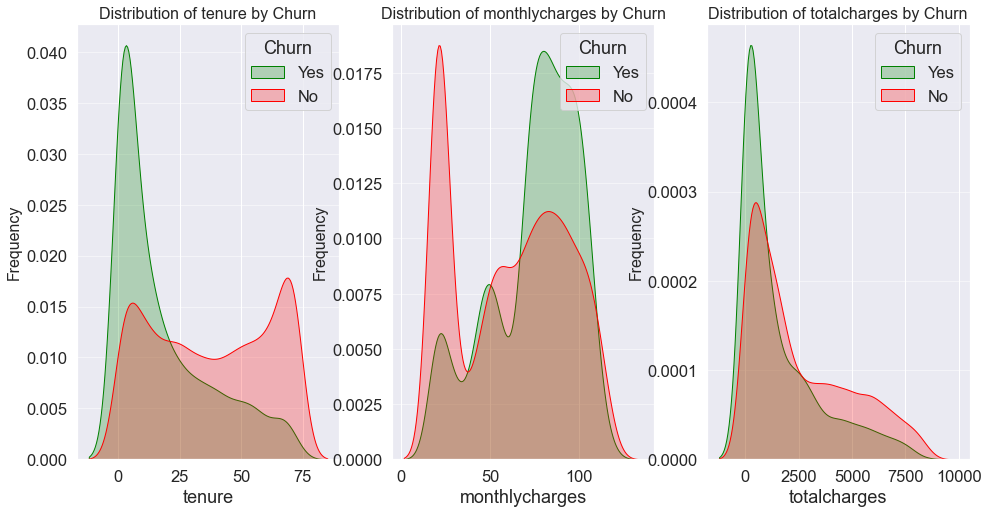

In [114]:
# Exploring continuous numerical features by Churn:

numerical_columns = ['tenure', 'monthlycharges', 'totalcharges']
numeric_by_churn(numerical_columns, 3, 'Continuous_num_cols_by_churn')

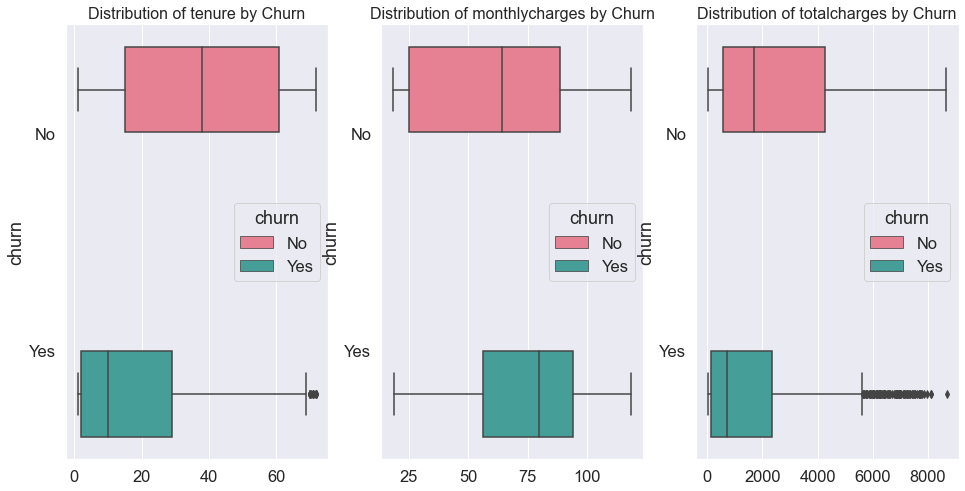

In [115]:
# Exploring continuous numerical features by Churn:

numerical_columns = ['tenure', 'monthlycharges', 'totalcharges']   
boxplot_numeric_by_churn(numerical_columns, 3, 'numeric_boxplots.png')

* There are a lot of customers with less than 10 months of tenure, and another significant loyal customers segment with 60-70 months tenure. New customers are more likely to churn.
* Churn tends to be higher with higher monthly charges.
* Customers with higher total charges are less likely to churn. 
>> possible explanation: higher monthly charge leads to high churn at lower tenure, which is presented with higher churn at lower total charges.

In [116]:
data_EDA['churn'] = data_EDA['churn'].map({'Yes':1, 'No':0})

In [117]:
# Calculating avg tenure by churn:

data_EDA.groupby('churn')['tenure'].mean()

churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

In [118]:
# Calculating avg monthlycharges by churn:

data_EDA.groupby('churn')['monthlycharges'].mean()

churn
0    61.307408
1    74.441332
Name: monthlycharges, dtype: float64

In [119]:
# Calculating avg totalcharges by churn:

data_EDA.groupby('churn')['totalcharges'].mean()

churn
0    2555.344141
1    1531.796094
Name: totalcharges, dtype: float64

## Feature Engineering

In [120]:
data_ENG = data.copy()

In [121]:
# Map categorical binary columns into numeric binary variables:

columns_to_map = ['seniorcitizen', 'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']

for col in columns_to_map:
    data_ENG[col] = data_ENG[col].map({'Yes' : 1, 'No' : 0})

In [122]:
# Creating a new feature - whether a customer pays above or below avg monthlycharges per contract class:

grouped = data_ENG.groupby('contract')['monthlycharges'].mean()
data_ENG['pays_above_avg'] = 0
i=0

while i < len(data_ENG):
    if (data_ENG.loc[i, 'contract'] == 'Month-to-month') and (data_ENG.loc[i, 'monthlycharges'] > grouped.iloc[0, ]):
        data_ENG.loc[i, 'pays_above_avg'] = 1
    elif (data_ENG.loc[i, 'contract'] == 'One year') and (data_ENG.loc[i, 'monthlycharges'] > grouped.iloc[1, ]):
        data_ENG.loc[i, 'pays_above_avg'] = 1
    elif (data_ENG.loc[i, 'contract'] == 'Two year' and data_ENG.loc[i, 'monthlycharges'] > grouped.iloc[2, ]):
        data_ENG.loc[i, 'pays_above_avg'] = 1
        
    i += 1

    
data_ENG.groupby('pays_above_avg')['churn'].agg(['count', 'mean'])

,count,mean
pays_above_avg,,
0,3115,0.167255
1,3917,0.344141


In [123]:
# Creating a new feature - whether a customer opted for a bundle package (phone+internet), phone only or internet only:

data_ENG['package'] = None
i=0

while i < len(data_ENG):
    if (data_ENG.loc[i, 'phoneservice'] == 1) and ((data_ENG.loc[i, 'internetservice'] == 'DSL') or (data_ENG.loc[i, 'internetservice'] == 'Fiber optic')):
        data_ENG.loc[i, 'package'] = 'Bundle'
    elif (data_ENG.loc[i, 'phoneservice'] == 1) and (data_ENG.loc[i, 'internetservice'] == 'No'):
        data_ENG.loc[i, 'package'] = 'Phone only'
    elif (data_ENG.loc[i, 'phoneservice'] == 0) and ((data_ENG.loc[i, 'internetservice'] == 'DSL') or (data_ENG.loc[i, 'internetservice'] == 'Fiber optic')):
        data_ENG.loc[i, 'package'] = 'Internet only'
     
    i += 1

data_ENG.groupby('package')['churn'].agg(['count', 'mean'])

,count,mean
package,,
Bundle,4832,0.328228
Internet only,680,0.250000
Phone only,1520,0.074342


In [124]:
# Convert non-binary categorical features into dummy variables:

data_ENG = pd.get_dummies(data_ENG)

In [125]:
# Creating a new feature - number of additional internet-based services a customer opted to have 
# (between 0-6):

data_ENG['num_internet_services'] = (data_ENG['onlinesecurity_Yes'] + data_ENG['onlinebackup_Yes'] + 
                                   data_ENG['deviceprotection_Yes'] + data_ENG['techsupport_Yes'] + 
                                   data_ENG['streamingtv_Yes'] + data_ENG['streamingmovies_Yes'])
data_ENG['num_internet_services'].astype(str)
data_ENG.groupby('num_internet_services')['churn'].agg(['count', 'mean'])

,count,mean
num_internet_services,,
0,2213,0.214641
1,966,0.457557
2,1033,0.358180
3,1117,0.273948
4,850,0.223529
5,569,0.124780
6,284,0.052817


In [126]:
data_ENG = pd.get_dummies(data_ENG, columns=['num_internet_services'])

In [127]:
pd.options.display.max_columns = len(data_ENG.columns)
data_ENG

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,pays_above_avg,gender_Female,gender_Male,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer,paymentmethod_Credit card,paymentmethod_Electronic check,paymentmethod_Mailed check,package_Bundle,package_Internet only,package_Phone only,num_internet_services_0,num_internet_services_1,num_internet_services_2,num_internet_services_3,num_internet_services_4,num_internet_services_5,num_internet_services_6
0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
2,0,0,0,2,1,1,53.85,108.15,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0,0,0,45,0,0,42.30,1840.75,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,84.80,1990.50,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
7028,0,1,1,72,1,1,103.20,7362.90,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
7029,0,1,1,11,0,1,29.60,346.45,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
7030,1,1,0,4,1,1,74.40,306.60,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0


***
## Model Building
***

In [128]:
data_final = data_ENG.copy()
data_final = data_final.astype(float)
data_final.dtypes

seniorcitizen                           float64
partner                                 float64
dependents                              float64
tenure                                  float64
phoneservice                            float64
paperlessbilling                        float64
monthlycharges                          float64
totalcharges                            float64
churn                                   float64
pays_above_avg                          float64
gender_Female                           float64
gender_Male                             float64
multiplelines_No                        float64
multiplelines_No phone service          float64
multiplelines_Yes                       float64
internetservice_DSL                     float64
internetservice_Fiber optic             float64
internetservice_No                      float64
onlinesecurity_No                       float64
onlinesecurity_No internet service      float64
onlinesecurity_Yes                      

In [129]:
# Splitting the data in training and testing sets:

seed=444
train, test = train_test_split(data_final, test_size=0.1, random_state=seed, shuffle=True, stratify=data_final['churn'])

x_train = train.drop('churn', axis=1)
y_train = train['churn']

x_test = test.drop('churn', axis=1)
y_test = test['churn']

In [130]:
train

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,pays_above_avg,gender_Female,gender_Male,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer,paymentmethod_Credit card,paymentmethod_Electronic check,paymentmethod_Mailed check,package_Bundle,package_Internet only,package_Phone only,num_internet_services_0,num_internet_services_1,num_internet_services_2,num_internet_services_3,num_internet_services_4,num_internet_services_5,num_internet_services_6
2815,0.0,0.0,0.0,53.0,1.0,0.0,24.05,1301.90,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6521,1.0,1.0,0.0,63.0,0.0,0.0,36.10,2298.90,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3390,0.0,1.0,1.0,58.0,1.0,0.0,99.25,5846.65,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5123,0.0,1.0,0.0,44.0,1.0,1.0,96.10,4364.10,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2153,0.0,1.0,1.0,57.0,1.0,1.0,84.50,4845.40,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1.0,0.0,0.0,1.0,1.0,0.0,45.10,45.10,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3773,1.0,1.0,1.0,66.0,1.0,0.0,79.40,5154.60,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1429,0.0,0.0,0.0,12.0,1.0,1.0,99.95,1132.75,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
753,1.0,0.0,0.0,20.0,1.0,1.0,98.55,1842.80,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [131]:
test

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,pays_above_avg,gender_Female,gender_Male,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer,paymentmethod_Credit card,paymentmethod_Electronic check,paymentmethod_Mailed check,package_Bundle,package_Internet only,package_Phone only,num_internet_services_0,num_internet_services_1,num_internet_services_2,num_internet_services_3,num_internet_services_4,num_internet_services_5,num_internet_services_6
532,1.0,1.0,1.0,68.0,1.0,1.0,107.15,7379.80,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1175,1.0,1.0,0.0,43.0,1.0,1.0,94.30,3953.15,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
355,0.0,0.0,0.0,10.0,1.0,1.0,80.25,846.00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
288,1.0,0.0,0.0,8.0,1.0,1.0,74.50,606.55,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4226,0.0,1.0,0.0,33.0,0.0,0.0,59.55,2016.30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,0.0,0.0,0.0,1.0,1.0,0.0,49.00,49.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3002,1.0,0.0,0.0,32.0,1.0,1.0,74.40,2276.95,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4643,0.0,0.0,0.0,15.0,1.0,0.0,86.20,1270.20,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
672,0.0,0.0,0.0,22.0,1.0,1.0,24.85,493.40,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
print('x_train shape: ', x_train.shape, '\ny_train shape: ', y_train.shape, '\nx_test shape: ', 
      x_test.shape, '\ny_test shape: ', y_test.shape)

x_train shape:  (6328, 52) 
y_train shape:  (6328,) 
x_test shape:  (704, 52) 
y_test shape:  (704,)


### Features Selection by Pearson Correlation

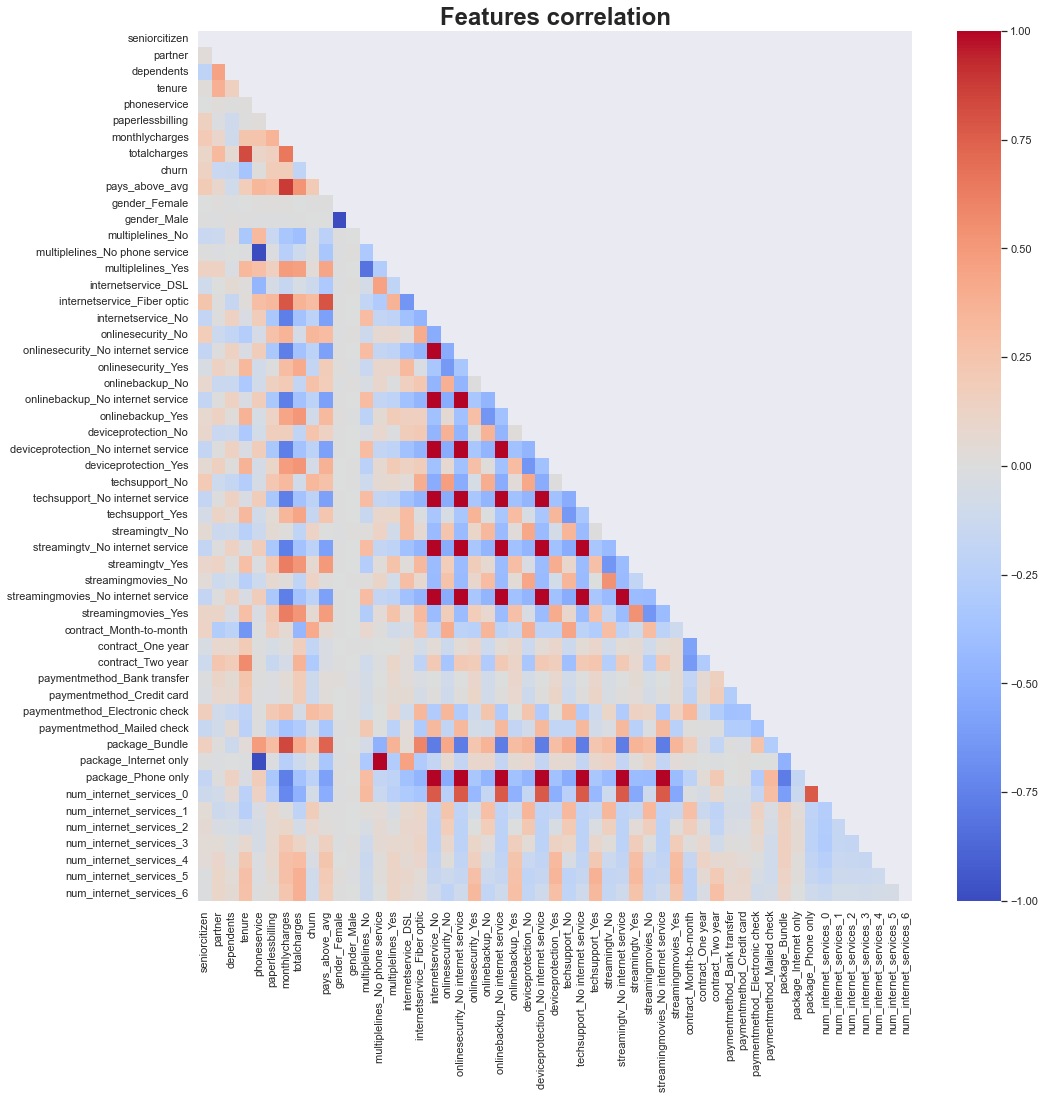

In [133]:
# Correlation between all variables:

plt.figure(figsize=(16,16))
sns.set(font_scale=1)
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Features correlation', fontsize=24, weight='bold')
#plt.savefig('Correlation Heatmap.png')
plt.show()

Relations between variables exhibited above are expected.
Strong correlation between: 
* phoneservice and multiplelines
* internetservice and related additional internet based services.
* internet based services themselves.

In [134]:
# Correlation of all features with the target value 'Churn':

corr = train.corr()['churn'].sort_values(ascending=False)
pd.options.display.max_rows = len(corr)
corr

churn                                   1.000000
contract_Month-to-month                 0.408236
onlinesecurity_No                       0.342122
techsupport_No                          0.334018
internetservice_Fiber optic             0.303682
paymentmethod_Electronic check          0.300612
onlinebackup_No                         0.271001
deviceprotection_No                     0.252671
package_Bundle                          0.206793
pays_above_avg                          0.195965
paperlessbilling                        0.189470
monthlycharges                          0.189325
num_internet_services_1                 0.171986
seniorcitizen                           0.146763
streamingmovies_No                      0.130611
streamingtv_No                          0.126793
num_internet_services_2                 0.082323
streamingtv_Yes                         0.063261
streamingmovies_Yes                     0.059533
multiplelines_Yes                       0.036545
num_internet_service

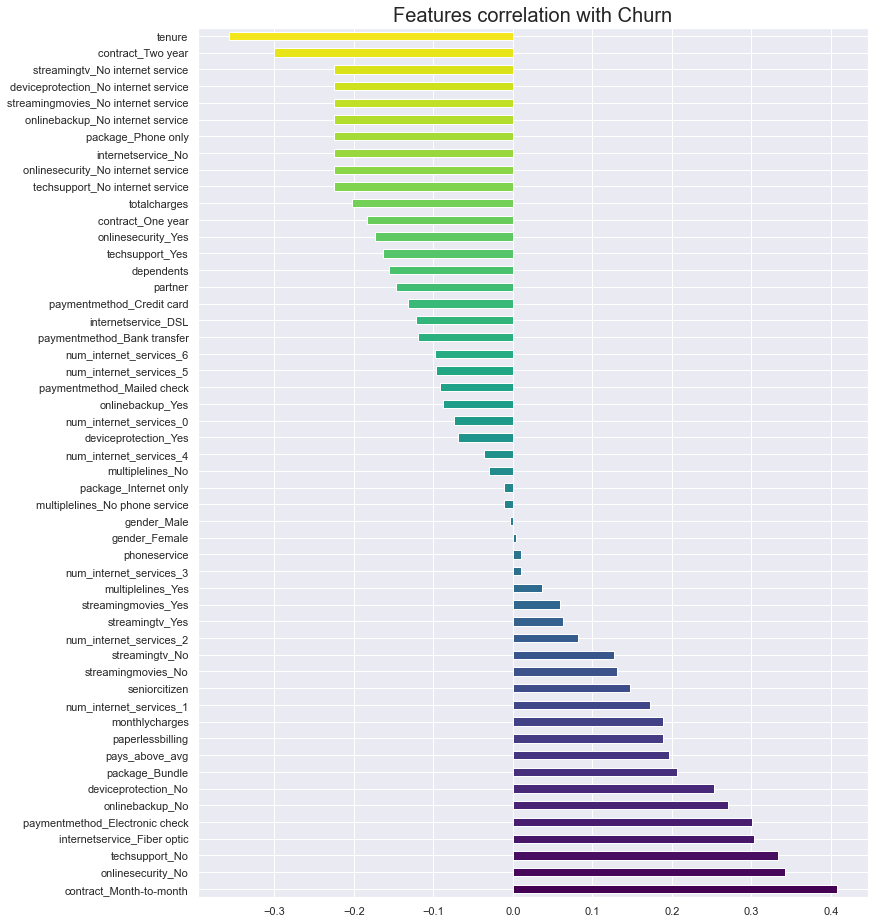

In [135]:
fig, ax = plt.subplots(figsize=(12,16))
colormap = plt.get_cmap('viridis')
corr[1:].plot(kind='barh', color=colormap(np.linspace(0, 1,len(corr))), ax=ax)
ax.set_title('Features correlation with Churn', fontsize=20)
#plt.savefig('Features correlation with Churn.png')
plt.show()

* There is a strong positive correlation between monthly contracts and churn – this is logical: no bounding contracts allow for easy attrition
* There is a strong negative correlation between tenure and churn – this is logical: longer tenure >> higher loyalty >> less churn

Areas of positive correlation with churn that need more exploring: 
* Fiber optic internet
* Electronic check payment method
* Paperless billing 
* Senior citizens

In [136]:
# Defining a function to drop selected feature above a threshold correlation:

def FS_correlation(corr_threshold):
    col_corr = set()  # For storing features
    corr_matrix = x_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > corr_threshold: # absolute values to handle positive and negative correlations
                feature1 = corr_matrix.index[i]
                feature2 = corr_matrix.columns[j]
                if abs(corr[feature1]) >= abs(corr[feature2]):
                    col_corr.add(feature2)
                else:
                    col_corr.add(feature1)
    x_train.drop(col_corr, axis=1, inplace=True)
    x_test.drop(col_corr, axis=1, inplace=True)
    return col_corr
    

FS_correlation(0.9)

{'deviceprotection_No internet service',
 'gender_Male',
 'internetservice_No',
 'multiplelines_No phone service',
 'onlinebackup_No internet service',
 'onlinesecurity_No internet service',
 'package_Internet only',
 'streamingmovies_No internet service',
 'streamingtv_No internet service',
 'techsupport_No internet service'}

***
## Assessing Algorithms
***

In [137]:
# Creating a DataFrame for comparing ML algorithms:

model_comparison = pd.DataFrame(columns=['Model','Accuracy','Execution time'])

### Setting a baseline

In [138]:
def get_baseline_predictions(x, baseline_value):
    return np.ones(len(x))*baseline_value


baseline_value = 0  # Setting baseline to the majority class 

y_test_pred_baseline = get_baseline_predictions(x_test, baseline_value)

baseline_accuracy = round(accuracy_score(y_test, y_test_pred_baseline), 3)
baseline_accuracy

0.734

### 1) Desicion Tree Classifier

#### 1.1) Descision Tree Classifier: max_depth=3

In [139]:
# Defining the algorithm:
model_dtc3 = DecisionTreeClassifier(max_depth=3)

t0=time.time()
# Running the algorithm with the training data:
model_dtc3.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_dtc3 = model_dtc3.predict(x_train)

# Predicting based on test data:
y_test_pred_dtc3 = model_dtc3.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_dtc3 = accuracy_score(y_train, y_train_pred_dtc3).round(3)

# Getting accuracy score for test data:
accuracy_test_dtc3 = accuracy_score(y_test, y_test_pred_dtc3).round(3)

# Execution time in seconds:
execution_time_dtc3 = round(t1-t0, 2)

print('Desicion Tree Classifier Accuracy (train): ', accuracy_train_dtc3) 
print('Desicion Tree Classifier Accuracy (test): ', accuracy_test_dtc3) 
print('Execution time (sec): ', execution_time_dtc3)

Desicion Tree Classifier Accuracy (train):  0.791
Desicion Tree Classifier Accuracy (test):  0.778
Execution time (sec):  0.04


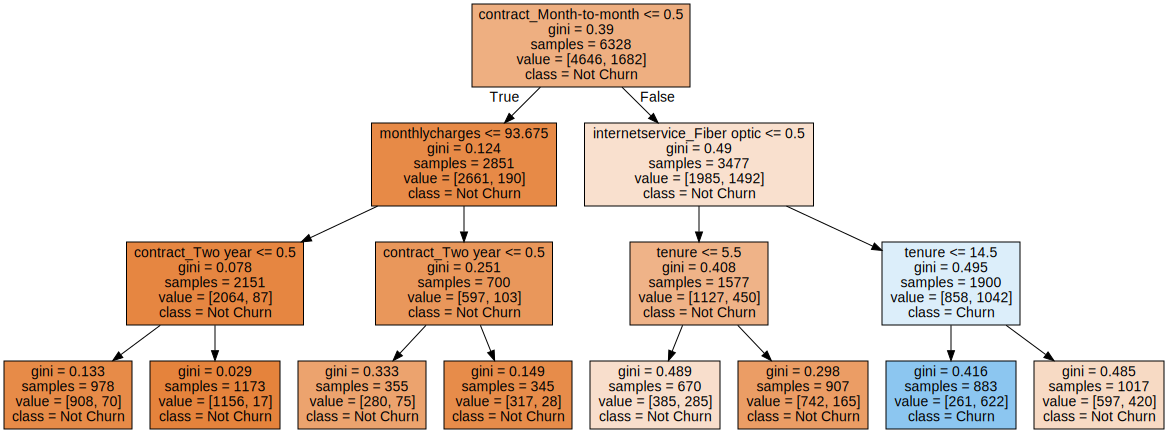

In [140]:
# Plotting the decision tree:

plot_tree(model_dtc3, x_train.columns, ['Not Churn', 'Churn'])

#### 1.2) Descision Tree Classifier: max_depth=4

In [141]:
# Defining the algorithm:
model_dtc4 = DecisionTreeClassifier(max_depth=4)

t0=time.time()
# Running the algorithm with the training data:
model_dtc4.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_dtc4 = model_dtc4.predict(x_train)

# Predicting based on test data:
y_test_pred_dtc4 = model_dtc4.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_dtc4 = accuracy_score(y_train, y_train_pred_dtc4).round(3)

# Getting accuracy score for test data:
accuracy_test_dtc4 = accuracy_score(y_test, y_test_pred_dtc4).round(3)

# Execution time in seconds:
execution_time_dtc4 = round(t1-t0, 2)

print('Desicion Tree Classifier Accuracy (train): ', accuracy_train_dtc4)
print('Desicion Tree Classifier Accuracy (test): ', accuracy_test_dtc4)
print('Execution time (sec): ', execution_time_dtc4)

Desicion Tree Classifier Accuracy (train):  0.796
Desicion Tree Classifier Accuracy (test):  0.774
Execution time (sec):  0.03


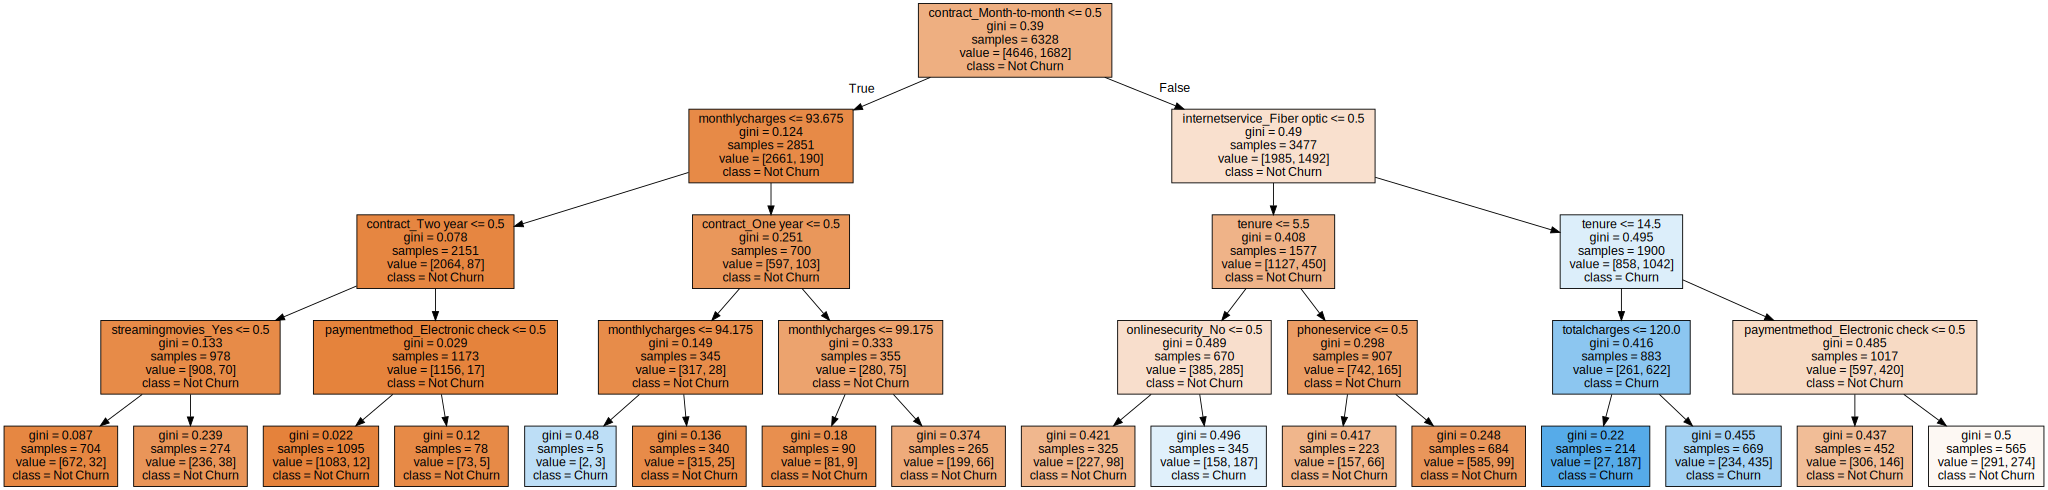

In [142]:
# Plotting the decision tree:

plot_tree(model_dtc4, x_train.columns, ['Not Churn', 'Churn'])

#### 1.3) Descision Tree Classifier: max_depth=5

In [143]:
# Defining the algorithm:
model_dtc5 = DecisionTreeClassifier(max_depth=5)

t0=time.time()
# Running the algorithm with the training data:
model_dtc5.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_dtc5 = model_dtc5.predict(x_train)

# Predicting based on test data:
y_test_pred_dtc5 = model_dtc5.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_dtc5 = accuracy_score(y_train, y_train_pred_dtc5).round(3)

# Getting accuracy score for test data:
accuracy_test_dtc5 = accuracy_score(y_test, y_test_pred_dtc5).round(3)

# Execution time in seconds:
execution_time_dtc5 = round(t1-t0, 2)

print('Desicion Tree Classifier Accuracy (train): ', accuracy_train_dtc5)
print('Desicion Tree Classifier Accuracy (test): ', accuracy_test_dtc5)
print('Execution time (sec): ', execution_time_dtc5)

Desicion Tree Classifier Accuracy (train):  0.803
Desicion Tree Classifier Accuracy (test):  0.783
Execution time (sec):  0.04


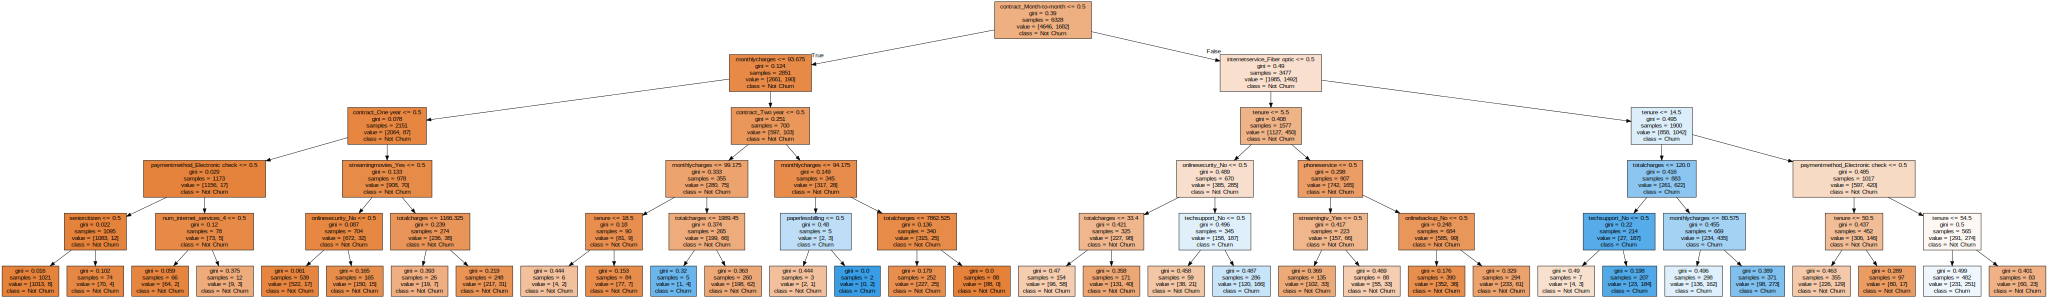

In [144]:
# Plotting the decision tree:

plot_tree(model_dtc5, x_train.columns, ['Not Churn', 'Churn'])

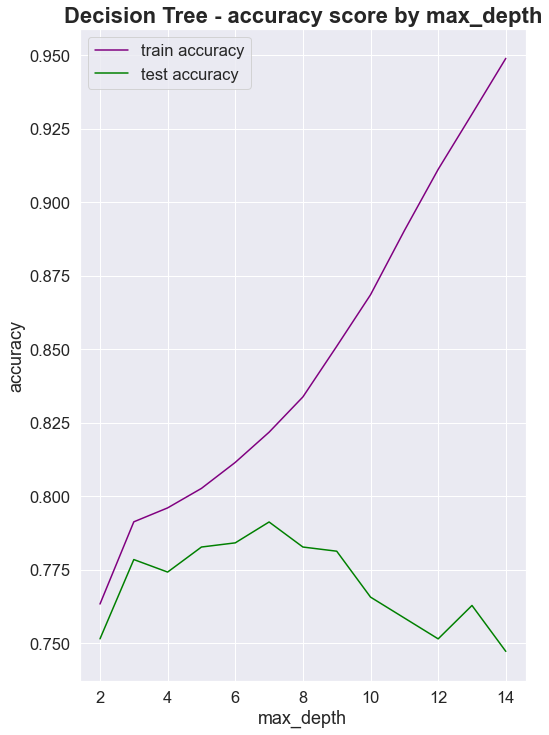

In [145]:
# Tuning the hyperparameter max_depth:

max_depth_list = np.arange(2,15)

train_accuracy_dtc = []
test_accuracy_dtc = []

for x in max_depth_list:
    model_dtc = DecisionTreeClassifier(max_depth=x)
    model_dtc.fit(x_train, y_train)
    y_train_pred_dtc = model_dtc.predict(x_train)
    y_test_pred_dtc = model_dtc.predict(x_test)
    dtc_train_accuracy = accuracy_score(y_train_pred_dtc, y_train)
    dtc_test_accuracy = accuracy_score(y_test_pred_dtc, y_test)
    train_accuracy_dtc.append(dtc_train_accuracy)
    test_accuracy_dtc.append(dtc_test_accuracy)
    
    
plt.figure(figsize=(8,12))
sns.set(font_scale=1.5)
x = np.array(max_depth_list)
plt.plot(x, train_accuracy_dtc, label = 'train accuracy', c='purple')
plt.plot(x, test_accuracy_dtc, label = 'test accuracy', c='green')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Decision Tree - accuracy score by max_depth', fontsize=22, weight='bold')
plt.legend()
#plt.savefig('DT accuracy.png')
plt.show()

In [146]:
# Computing max_depth which maximizes accuracy:
max_accuracy = max(test_accuracy_dtc)
accuracy_max_depth = 0
for i in range(len(test_accuracy_dtc)):
    if test_accuracy_dtc[i] == max_accuracy:
        accuracy_max_depth = i+2
        
accuracy_max_depth

7

In [147]:
# Based on above results, we'll add the results of the Decision Tree algorithm with hyperparameter max_depth = 7
# to the final algorithms accuracy lists:

# Defining the algorithm:
model_dtc = DecisionTreeClassifier(max_depth=accuracy_max_depth)

t0=time.time()
# Running the algorithm with the training data:
model_dtc.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_dtc = model_dtc.predict(x_train)

# Predicting based on test data:
y_test_pred_dtc = model_dtc.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_dtc = accuracy_score(y_train, y_train_pred_dtc).round(3)

# Getting accuracy score for test data:
accuracy_test_dtc = accuracy_score(y_test, y_test_pred_dtc).round(3)

# Execution time in seconds:
execution_time_dtc = round(t1-t0, 2)

print('Desicion Tree Classifier Accuracy (train): ', accuracy_train_dtc)
print('Desicion Tree Classifier Accuracy (test): ', accuracy_test_dtc)
print('Execution time (sec): ', execution_time_dtc)

results = {'Model' : ['DecisionTreeClassifier'] ,'Accuracy' : [accuracy_test_dtc] , 'Execution time' : [execution_time_dtc]}
results = pd.DataFrame(results)

model_comparison = pd.concat([model_comparison, results])
model_comparison

Desicion Tree Classifier Accuracy (train):  0.822
Desicion Tree Classifier Accuracy (test):  0.791
Execution time (sec):  0.04


,Model,Accuracy,Execution time
0,DecisionTreeClassifier,0.791,0.04


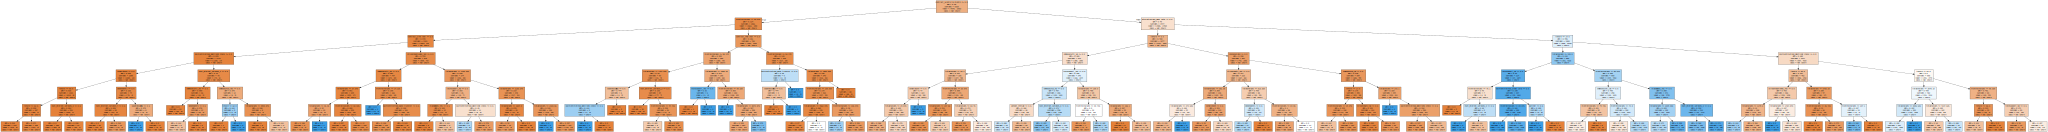

In [148]:
# Plotting the decision tree:

plot_tree(model_dtc, x_train.columns, ['Not Churn', 'Churn'])

### 2) Random Forest Classifier

#### 1.1 Random Forest Classifier: max_depth=3

In [149]:
rf_seed=42
# Defining the algorithm:
model_rfc3 = RandomForestClassifier(n_estimators=101, max_depth=3, random_state=rf_seed)

t0=time.time()
# Running the algorithm with the training data:
model_rfc3.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_rfc3 = model_rfc3.predict(x_train)

# Predicting based on test data:
y_test_pred_rfc3 = model_rfc3.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_rfc3 = accuracy_score(y_train, y_train_pred_rfc3).round(3)

# Getting accuracy score for test data:
accuracy_test_rfc3 = accuracy_score(y_test, y_test_pred_rfc3).round(3)

# Execution time in seconds:
execution_time_rfc3 = round(t1-t0, 2)

print('Random Forest Classifier Accuracy (train): ', accuracy_train_rfc3)
print('Random Forest Classifier Accuracy (test): ', accuracy_test_rfc3)
print('Execution time (sec): ', execution_time_rfc3)

Random Forest Classifier Accuracy (train):  0.788
Random Forest Classifier Accuracy (test):  0.78
Execution time (sec):  0.39


#### 1.2 Random Forest Classifier: max_depth=4

In [150]:
# Defining the algorithm:
model_rfc4 = RandomForestClassifier(n_estimators=101, max_depth=4, random_state=rf_seed)

t0=time.time()
# Running the algorithm with the training data:
model_rfc4.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_rfc4 = model_rfc4.predict(x_train)

# Predicting based on test data:
y_test_pred_rfc4 = model_rfc4.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_rfc4 = accuracy_score(y_train, y_train_pred_rfc4).round(3)

# Getting accuracy score for test data:
accuracy_test_rfc4 = accuracy_score(y_test, y_test_pred_rfc4).round(3)

# Execution time in seconds:
execution_time_rfc4 = round(t1-t0, 2)

print('Random Forest Classifier Accuracy (train): ', accuracy_train_rfc4)
print('Random Forest Classifier Accuracy (test): ', accuracy_test_rfc4)
print('Execution time (sec): ', execution_time_rfc4)

Random Forest Classifier Accuracy (train):  0.797
Random Forest Classifier Accuracy (test):  0.78
Execution time (sec):  0.54


#### 1.3 Random Forest Classifier: max_depth=5

In [151]:
# Defining the algorithm:
model_rfc5 = RandomForestClassifier(n_estimators=101, max_depth=5, random_state=rf_seed)

t0=time.time()
# Running the algorithm with the training data:
model_rfc5.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_rfc5 = model_rfc5.predict(x_train)

# Predicting based on test data:
y_test_pred_rfc5 = model_rfc5.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_rfc5 = accuracy_score(y_train, y_train_pred_rfc5).round(3)

# Getting accuracy score for test data:
accuracy_test_rfc5 = accuracy_score(y_test, y_test_pred_rfc5).round(3)

# Execution time in seconds:
execution_time_rfc5 = round(t1-t0, 2)

print('Random Forest Classifier Accuracy (train): ', accuracy_train_rfc5)
print('Random Forest Classifier Accuracy (test): ', accuracy_test_rfc5)
print('Execution time (sec): ', execution_time_rfc5)

Random Forest Classifier Accuracy (train):  0.805
Random Forest Classifier Accuracy (test):  0.78
Execution time (sec):  0.6


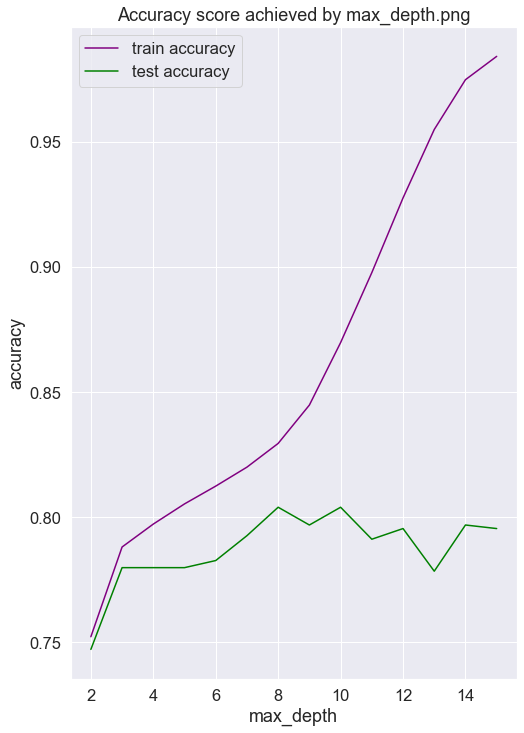

In [152]:
# Tuning the hyperparameter max_depth:

max_depth_list = np.arange(2,16)

train_accuracy_rfc = []
test_accuracy_rfc = []


for x in max_depth_list:
    rfc = RandomForestClassifier(n_estimators=101, max_depth=x, random_state=rf_seed)
    rfc.fit(x_train, y_train)
    y_train_pred_rfc = rfc.predict(x_train)
    y_test_pred_rfc = rfc.predict(x_test)
    rfc_train_accuracy = accuracy_score(y_train_pred_rfc, y_train)
    rfc_test_accuracy = accuracy_score(y_test_pred_rfc, y_test)
    train_accuracy_rfc.append(rfc_train_accuracy)
    test_accuracy_rfc.append(rfc_test_accuracy)
    
plt.figure(figsize=(8,12))
sns.set(font_scale=1.5)
x = np.array(max_depth_list)
plt.plot(x, train_accuracy_rfc, label = 'train accuracy', c='purple')
plt.plot(x, test_accuracy_rfc, label = 'test accuracy', c='green')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy score achieved by max_depth.png')
plt.legend()
#plt.savefig('RF-max_depth')
plt.show()

In [153]:
# Computing max_depth which maximizes accuracy:
max_accuracy = max(test_accuracy_rfc)
accuracy_max_depth = 0
for i in range(len(test_accuracy_rfc)):
    if test_accuracy_rfc[i] == max_accuracy:
        accuracy_max_depth = i+2
        
accuracy_max_depth

10

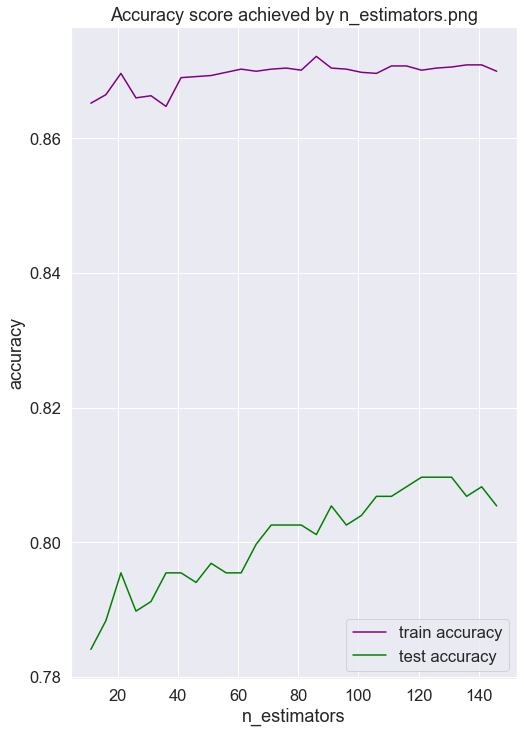

In [154]:
# Tuning the hyperparameter n_estimators:

n_estimators_list = np.arange(11,151,5)

train_accuracy_rfc = []
test_accuracy_rfc = []


for x in n_estimators_list:
    rfc = RandomForestClassifier(n_estimators=x, max_depth=accuracy_max_depth, random_state=rf_seed)
    rfc.fit(x_train, y_train)
    y_train_pred_rfc = rfc.predict(x_train)
    y_test_pred_rfc = rfc.predict(x_test)
    rfc_train_accuracy = accuracy_score(y_train_pred_rfc, y_train)
    rfc_test_accuracy = accuracy_score(y_test_pred_rfc, y_test)
    train_accuracy_rfc.append(rfc_train_accuracy)
    test_accuracy_rfc.append(rfc_test_accuracy)
    
plt.figure(figsize=(8,12))
sns.set(font_scale=1.5)
x = np.array(n_estimators_list)
plt.plot(x, train_accuracy_rfc, label = 'train accuracy', c='purple')
plt.plot(x, test_accuracy_rfc, label = 'test accuracy', c='green')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Accuracy score achieved by n_estimators.png')
plt.legend()
#plt.savefig('RF-n_estimators')
plt.show()

In [155]:
# Computing n_estimators which maximizes accuracy:
max_accuracy = max(test_accuracy_rfc)
accuracy_n_estimators = 0
for i in range(len(test_accuracy_rfc)):
    if test_accuracy_rfc[i] == max_accuracy:
        accuracy_n_estimators = (i*5)+11
        
accuracy_n_estimators

131

In [156]:
# Based on above results, we'll add the results of the Random Forest algorithm with hyperparameters max_depth = 10
# and n_estimators = 131 to the final algorithms accuracy lists:

# Defining the algorithm:
model_rfc = RandomForestClassifier(n_estimators=accuracy_n_estimators, max_depth=accuracy_max_depth, random_state=rf_seed)

t0=time.time()
# Running the algorithm with the training data:
model_rfc.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_rfc = model_rfc.predict(x_train)

# Predicting based on test data:
y_test_pred_rfc = model_rfc.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_rfc = accuracy_score(y_train, y_train_pred_rfc).round(3)

# Getting accuracy score for test data:
accuracy_test_rfc = accuracy_score(y_test, y_test_pred_rfc).round(3)

# Execution time in seconds:
execution_time_rfc = round(t1-t0, 2)

print('Random Forest Classifier Accuracy (train): ', accuracy_train_rfc)
print('Random Forest Classifier Accuracy (test): ', accuracy_test_rfc)
print('Execution time (sec): ', execution_time_rfc)

results = {'Model' : ['RandomForestClassifier'] ,'Accuracy' : [accuracy_test_rfc] , 'Execution time' : [execution_time_rfc]}
results = pd.DataFrame(results)

model_comparison = pd.concat([model_comparison, results])
model_comparison

Random Forest Classifier Accuracy (train):  0.871
Random Forest Classifier Accuracy (test):  0.81
Execution time (sec):  0.91


,Model,Accuracy,Execution time
0,DecisionTreeClassifier,0.791,0.04
0,RandomForestClassifier,0.81,0.91


### Random Forest Feature Importance

,feature,importance
3,tenure,0.135570
7,totalcharges,0.129623
26,contract_Month-to-month,0.115913
6,monthlycharges,0.095742
14,onlinesecurity_No,0.052829
20,techsupport_No,0.040025
31,paymentmethod_Electronic check,0.037236
13,internetservice_Fiber optic,0.034547
28,contract_Two year,0.032714
16,onlinebackup_No,0.020606


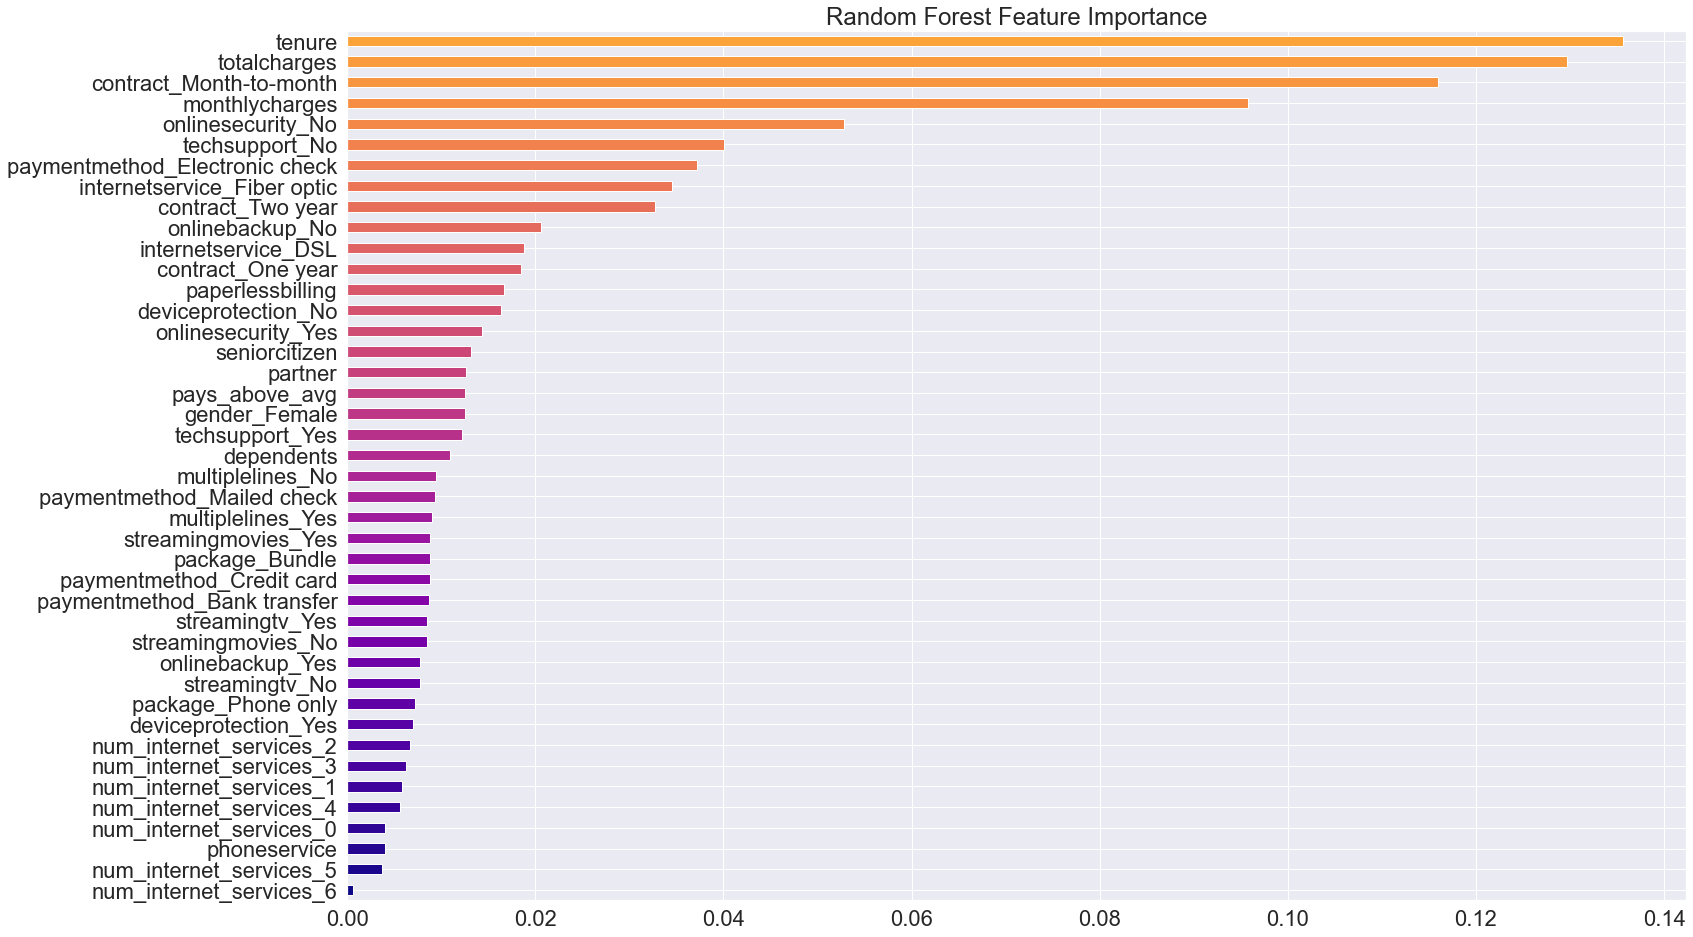

In [157]:
# Defining:
features_importance = model_rfc.feature_importances_

# Extract all the columns:
features = x_train.columns

sns.set(font_scale=2)
plt.figure(figsize=(24,16))
fig = pd.Series(features_importance, index=features).sort_values(ascending=True)
colormap=plt.get_cmap('plasma')
fig.plot(kind='barh', grid=True, color=colormap(np.linspace(0, 1,len(corr))))
plt.title('Random Forest Feature Importance')
#plt.savefig('Feature Importance of Random Forest.png')

# Creating DataFrame:
df_FTFI = pd.DataFrame({'feature':features, 'importance':features_importance}).sort_values('importance', ascending=False)
df_FTFI

### 3) KNN Classifier

In [158]:
# Defining scaler for normalization:
scaler = StandardScaler()

# Fit and transform:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### 1.1 KNN Classifier: n_neighbors=3

In [159]:
# Defining the algorithm:
model_knn3 = KNeighborsClassifier(n_neighbors=3)

t0=time.time()
# Running the algorithm with the training data:
model_knn3.fit(x_train_scaled, y_train)
t1=time.time()

# Predicting based on train data:
y_train_scaled_pred_knn3 = model_knn3.predict(x_train_scaled)

# Predicting based on test data:
y_test_scaled_pred_knn3 = model_knn3.predict(x_test_scaled)

# Getting accuracy score for train data:
accuracy_train_scaled_knn3 = accuracy_score(y_train, y_train_scaled_pred_knn3).round(3)

# Getting accuracy score for test data:
accuracy_test_scaled_knn3 = accuracy_score(y_test, y_test_scaled_pred_knn3).round(3)

# Execution time in seconds:
execution_time_knn3 = round(t1-t0, 2)

print('KNN Classifier Accuracy (train): ', accuracy_train_scaled_knn3)
print('KNN Classifier Accuracy (test): ', accuracy_test_scaled_knn3)
print('Execution time (sec): ', execution_time_knn3)

KNN Classifier Accuracy (train):  0.861
KNN Classifier Accuracy (test):  0.744
Execution time (sec):  0.0


#### 1.2 KNN Classifier: n_neighbors=5

In [160]:
# Defining the algorithm:
model_knn5 = KNeighborsClassifier(n_neighbors=5)

t0=time.time()
# Running the algorithm with the training data:
model_knn5.fit(x_train_scaled, y_train)
t1=time.time()

# Predicting based on train data:
y_train_scaled_pred_knn5 = model_knn5.predict(x_train_scaled)

# Predicting based on test data:
y_test_scaled_pred_knn5 = model_knn5.predict(x_test_scaled)

# Getting accuracy score for train data:
accuracy_train_scaled_knn5 = accuracy_score(y_train, y_train_scaled_pred_knn5).round(3)

# Getting accuracy score for test data:
accuracy_test_scaled_knn5 = accuracy_score(y_test, y_test_scaled_pred_knn5).round(3)

# Execution time in seconds:
execution_time_knn5 = round(t1-t0, 2)

print('KNN Classifier Accuracy (train): ', accuracy_train_scaled_knn5)
print('KNN Classifier Accuracy (test): ', accuracy_test_scaled_knn5)
print('Execution time (sec): ', execution_time_knn5)

KNN Classifier Accuracy (train):  0.833
KNN Classifier Accuracy (test):  0.768
Execution time (sec):  0.0


#### 1.3 KNN Classifier: n_neighbors=7

In [161]:
# Defining the algorithm:
model_knn7 = KNeighborsClassifier(n_neighbors=7)

t0=time.time()
# Running the algorithm with the training data:
model_knn7.fit(x_train_scaled, y_train)
t1=time.time()

# Predicting based on train data:
y_train_scaled_pred_knn7 = model_knn7.predict(x_train_scaled)

# Predicting based on test data:
y_test_scaled_pred_knn7 = model_knn7.predict(x_test_scaled)

# Getting accuracy score for train data:
accuracy_train_scaled_knn7 = accuracy_score(y_train, y_train_scaled_pred_knn7).round(3)

# Getting accuracy score for test data:
accuracy_test_scaled_knn7 = accuracy_score(y_test, y_test_scaled_pred_knn7).round(3)

# Execution time in seconds:
execution_time_knn7 = round(t1-t0, 2)

print('KNN Classifier Accuracy (train): ', accuracy_train_scaled_knn7)
print('KNN Classifier Accuracy (test): ', accuracy_test_scaled_knn7)
print('Execution time (sec): ', execution_time_knn7)

KNN Classifier Accuracy (train):  0.819
KNN Classifier Accuracy (test):  0.767
Execution time (sec):  0.0


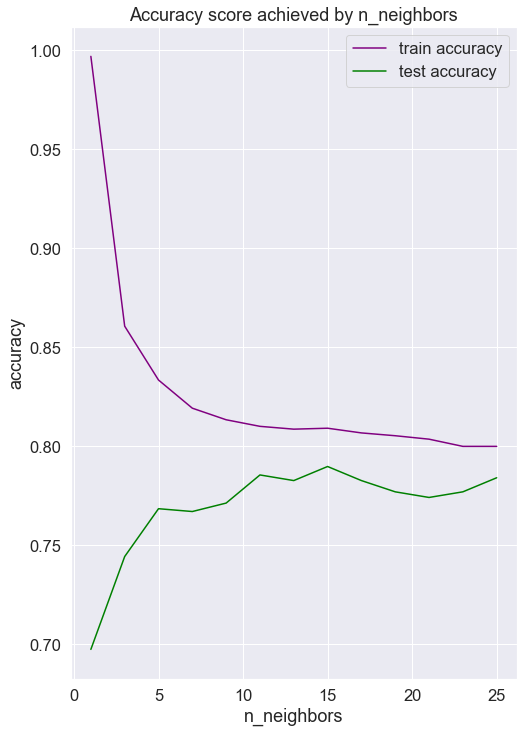

In [162]:
# Tuning the hyperparameter n_neighbors:

nn_list = np.arange(1,26,2)

train_scaled_accuracy_knn = []
test_scaled_accuracy_knn = []


for nn in nn_list:
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(x_train_scaled, y_train)
    y_train_scaled_pred_knn = knn.predict(x_train_scaled)
    y_test_scaled_pred_knn = knn.predict(x_test_scaled)
    knn_train_scaled_accuracy = accuracy_score(y_train_scaled_pred_knn, y_train)
    knn_test_scaled_accuracy = accuracy_score(y_test_scaled_pred_knn, y_test)
    train_scaled_accuracy_knn.append(knn_train_scaled_accuracy)
    test_scaled_accuracy_knn.append(knn_test_scaled_accuracy)
    
plt.figure(figsize=(8,12))
sns.set(font_scale=1.5)
x = np.array(nn_list)
plt.plot(x, train_scaled_accuracy_knn, label = 'train accuracy', c='purple')
plt.plot(x, test_scaled_accuracy_knn, label = 'test accuracy', c='green')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('Accuracy score achieved by n_neighbors')
plt.legend()
#plt.savefig('KNN accoracy by n_neighbors.png')
plt.show()

In [163]:
# Computing n_neighbors which maximizes accuracy:
max_accuracy = max(test_scaled_accuracy_knn)
nn_max = 1
for i in range(len(test_scaled_accuracy_knn)):
    if test_scaled_accuracy_knn[i] == max_accuracy:
        if i == 0:
            nn_max = 1
        else:
            nn_max = (i*2)+1
nn_max

15

In [164]:
# Based on above results, we'll add the results of the KNN algorithm with hyperparameters k = 15
# to the final algorithms accuracy lists:

# Defining the algorithm:
model_knn = KNeighborsClassifier(n_neighbors=nn_max)

t0=time.time()
# Running the algorithm with the training data:
model_knn.fit(x_train, y_train)
t1=time.time()

# Predicting based on train data:
y_train_pred_knn = model_knn.predict(x_train)

# Predicting based on test data:
y_test_pred_knn = model_knn.predict(x_test)

# Getting accuracy score for train data:
accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn).round(3)

# Getting accuracy score for test data:
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn).round(3)

# Execution time in seconds:
execution_time_knn = round(t1-t0, 2)

print('KNN Classifier Accuracy (train): ', accuracy_train_knn)
print('KNN Classifier Accuracy (test): ', accuracy_test_knn)
print('Execution time (sec): ', execution_time_knn)

results = {'Model' : ['KNN'] ,'Accuracy' : [accuracy_test_knn] , 'Execution time' : [execution_time_knn]}
results = pd.DataFrame(results)

model_comparison = pd.concat([model_comparison, results])

KNN Classifier Accuracy (train):  0.809
KNN Classifier Accuracy (test):  0.759
Execution time (sec):  0.01


In [165]:
model_comparison.set_index('Model', inplace=True)
model_comparison.rename_axis(None, inplace=True)
model_comparison

,Accuracy,Execution time
DecisionTreeClassifier,0.791,0.04
RandomForestClassifier,0.81,0.91
KNN,0.759,0.01


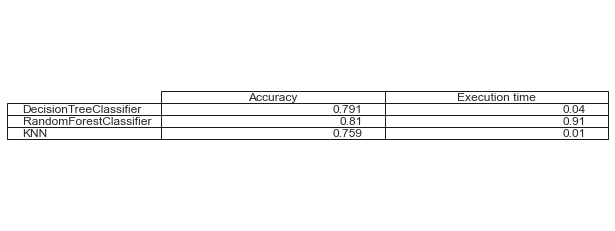

In [167]:
# Save DataFrame as png:
plt.figure(figsize=(8,4))
sns.set(font_scale=1)
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False) # hide the x axis
ax.yaxis.set_visible(False) # hide the y axis
table(ax, model_comparison, loc='center') # where df is your data frame
#plt.savefig('model_comparison.png')